In [101]:
pip install pandas numpy matplotlib seaborn scikit-learn joblib xgboost imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [102]:
import pandas as pd
import numpy as np

In [103]:
df=pd.read_csv("Employee-Attrition(raw).csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [104]:
df.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [105]:
#check for null and unique counts
print(df.isnull().sum())

print(df.nunique())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [106]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [107]:
# Dropping the columns with No unique values
df = df.loc[:, df.nunique() > 1]
df.shape

(1470, 32)

In [108]:
# Dropping the employeenumber column as it is not useful for prediction
df = df.drop("EmployeeNumber", axis=1)

In [109]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [110]:
# mapping attrition column to binary values
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [111]:
# mapping gender to binary values
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


# Feature Engineering

In [112]:

# Ratios
df["IncomePerYearOfWork"] = df["MonthlyIncome"] / (df["YearsAtCompany"] + 1)
df["ExperienceRatio"] = df["YearsAtCompany"] / (df["Age"] + 1)

# Flags
df["IsOverTime"] = df["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)
df["RecentPromotion"] = df["YearsSinceLastPromotion"].apply(lambda x: 1 if x < 2 else 0)

# Interactions
df["WorkLifeSatisfaction"] = df["JobSatisfaction"] * df["WorkLifeBalance"]
df["TenureEffect"] = df["YearsAtCompany"] * df["TrainingTimesLastYear"]

df['EngagementScore'] = df[['JobSatisfaction', 'EnvironmentSatisfaction', 
                            'WorkLifeBalance', 'RelationshipSatisfaction']].mean(axis=1)





In [113]:
# Clean up any potential NaN or infinite values created during division
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)


In [114]:
# Attrition value count
Attrition_counts = df['Attrition'].value_counts()

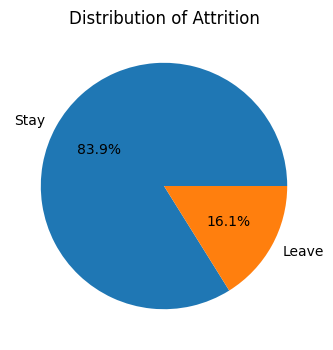

In [115]:
# Dataset is imbalanced => Resampling techniques may be needed
#  Distribution of Attrition
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.pie(df['Attrition'].value_counts(), labels=['Stay', 'Leave'], autopct='%1.1f%%')
plt.title('Distribution of Attrition')
plt.show()


# EXPLORATORY DATA ANALYSIS


<Figure size 1200x800 with 0 Axes>

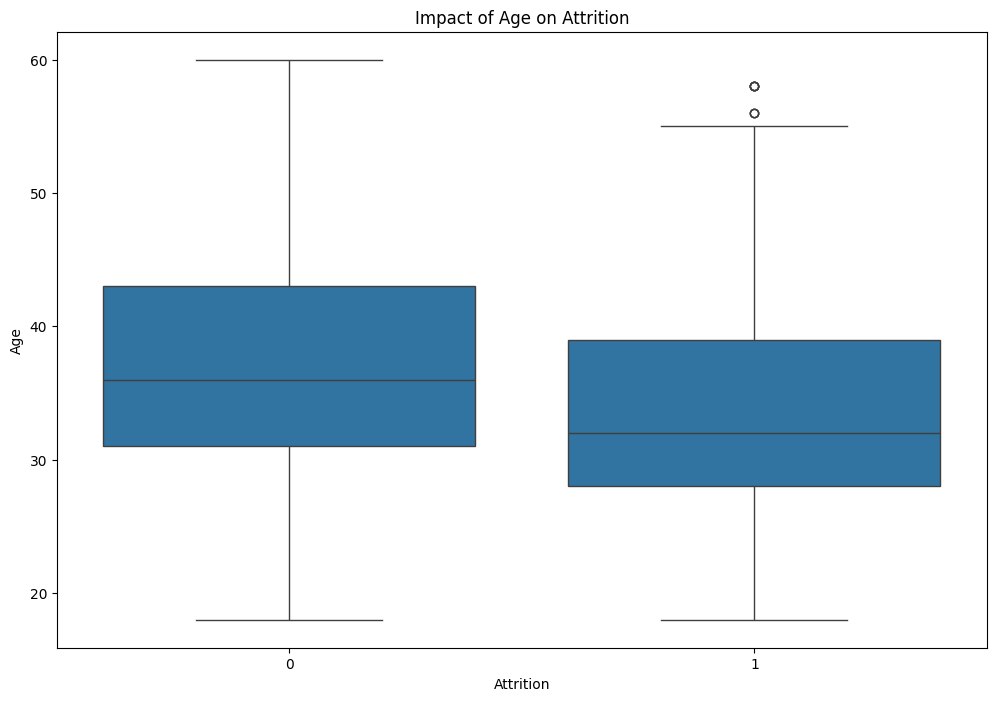

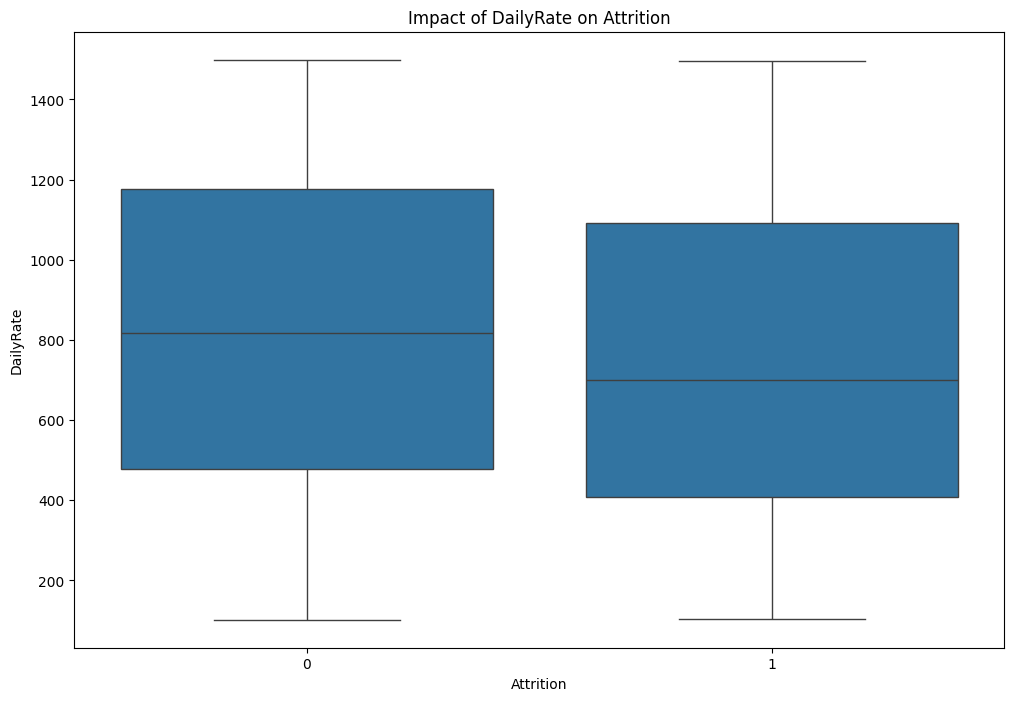

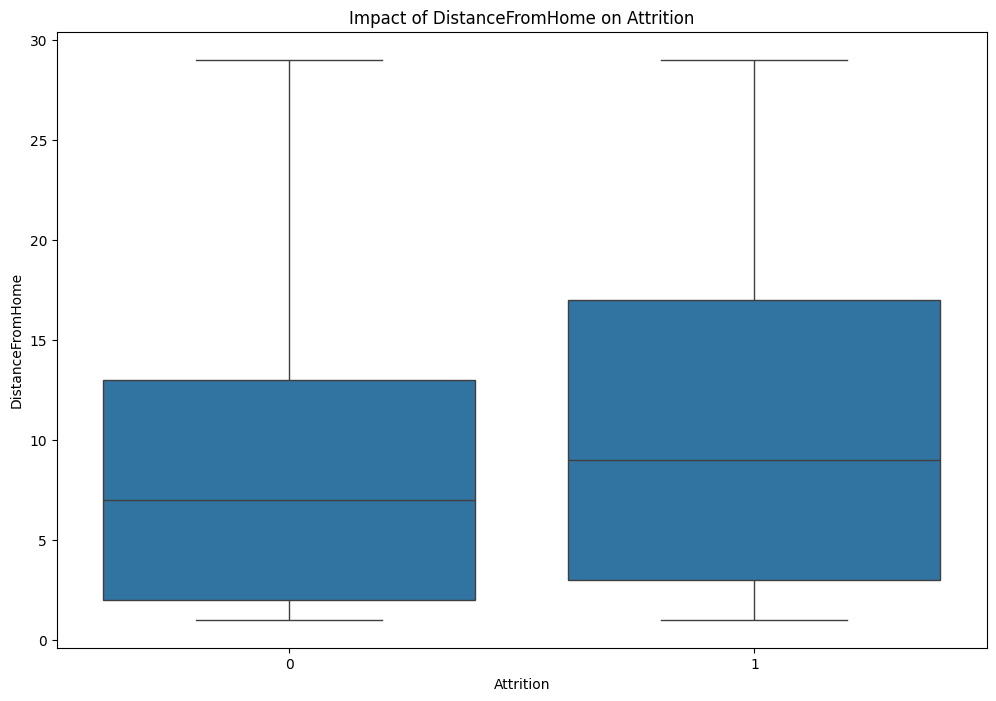

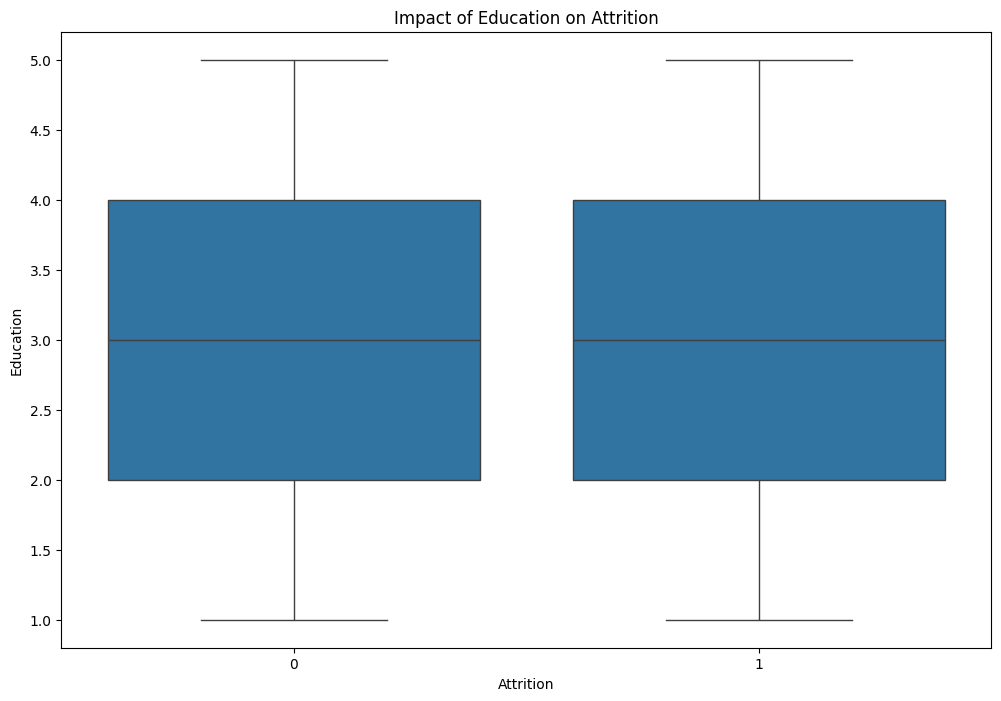

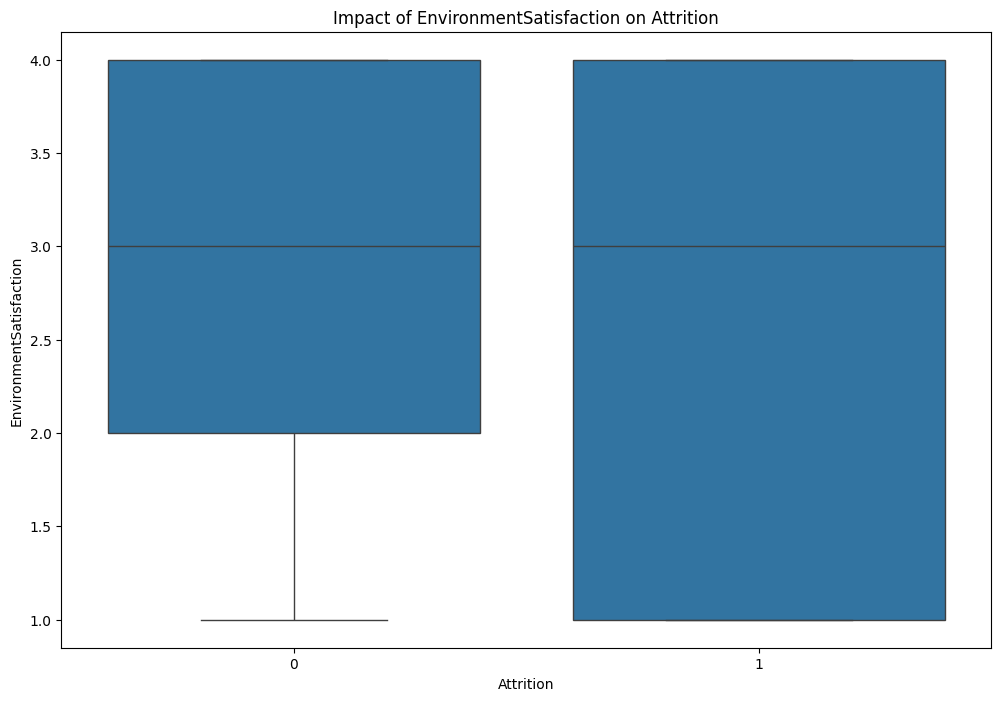

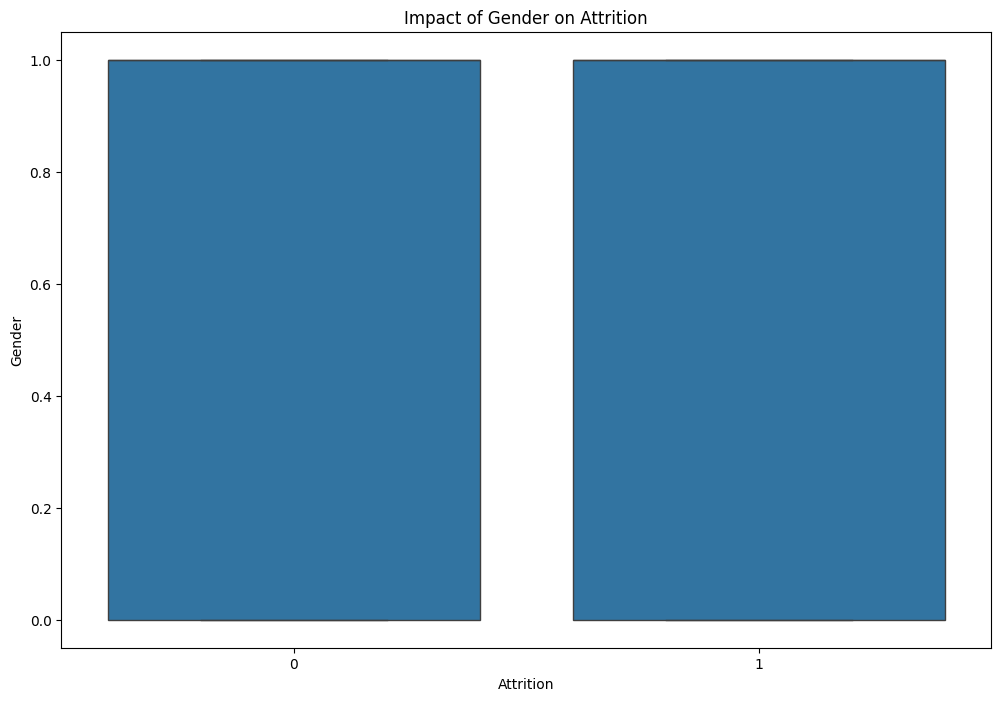

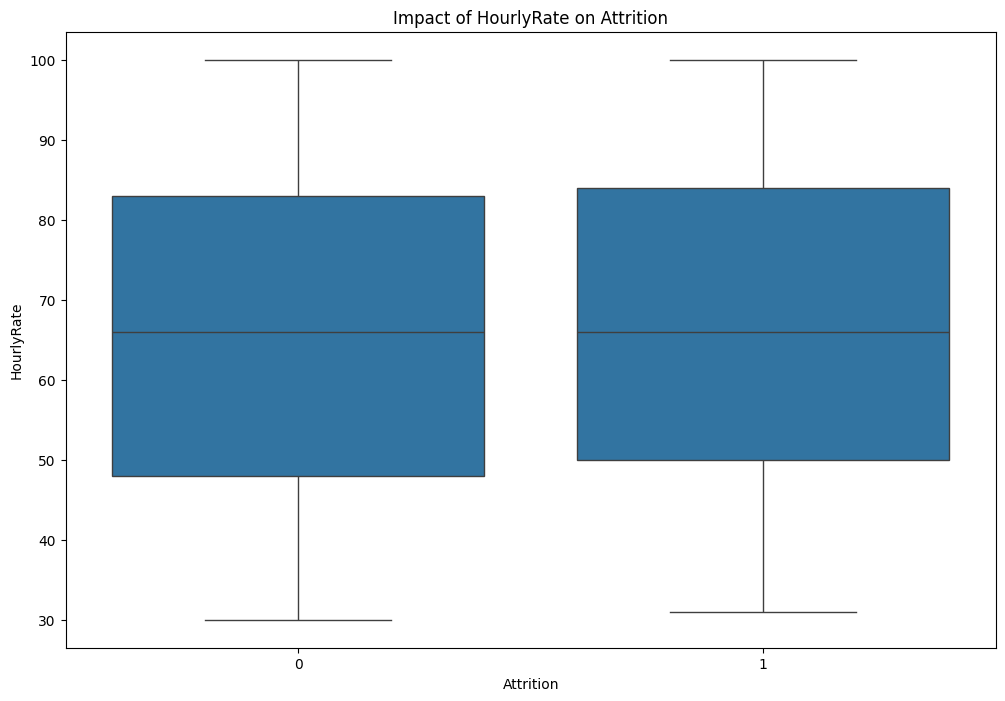

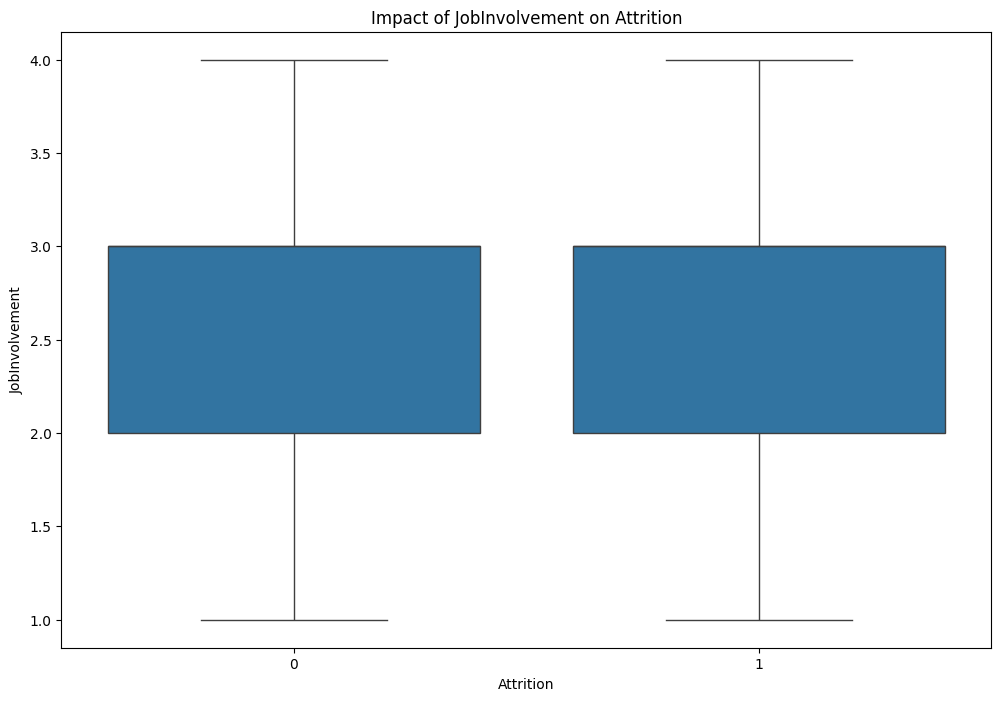

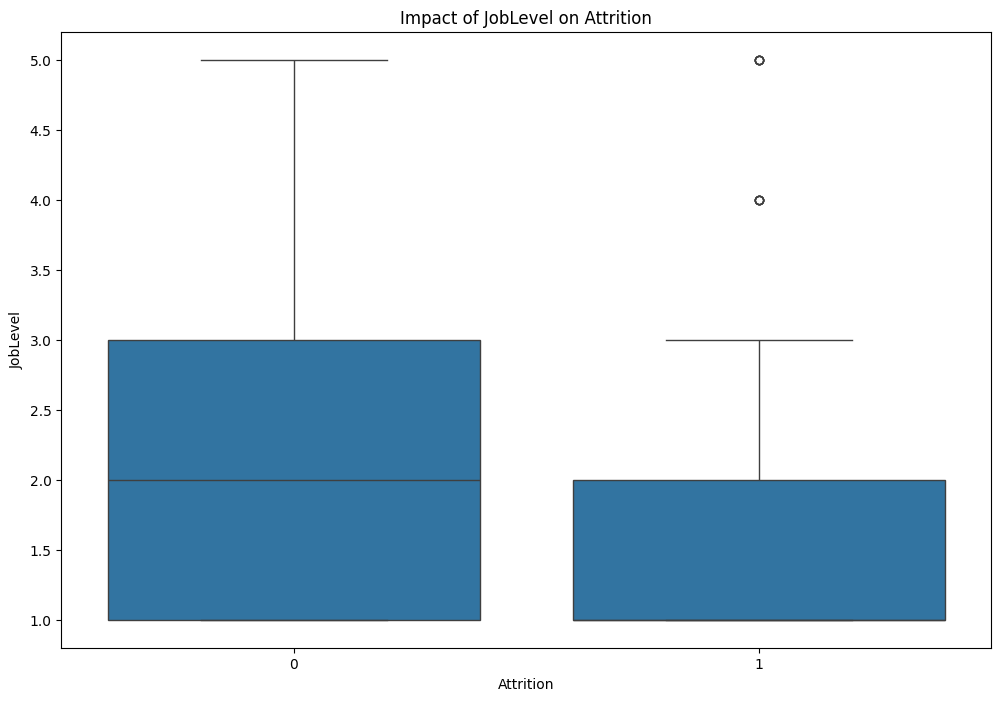

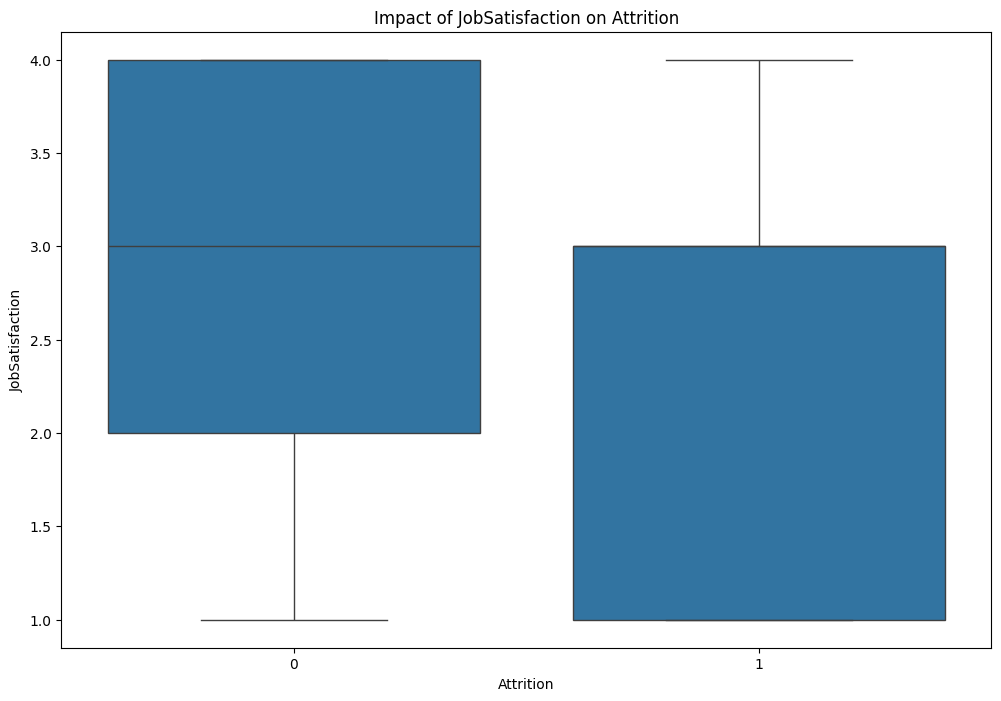

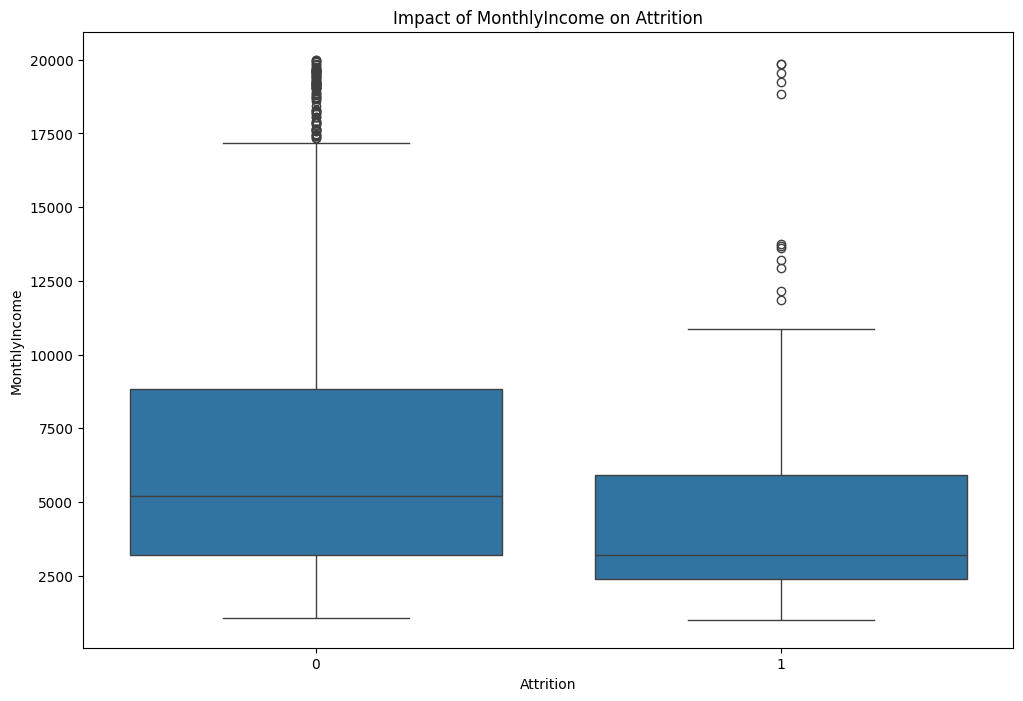

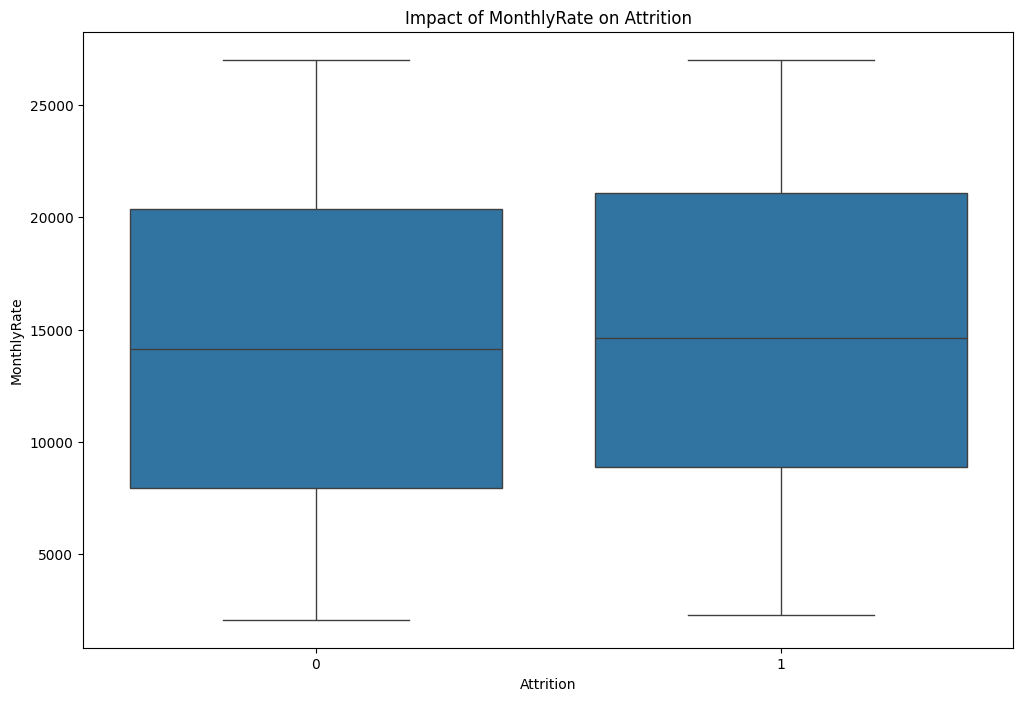

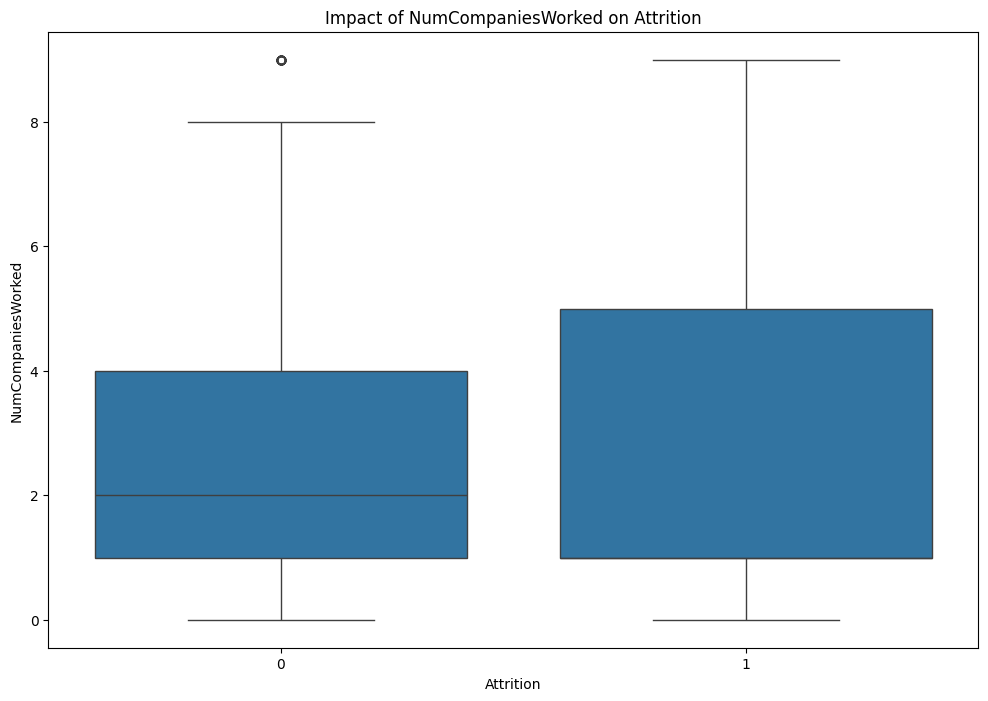

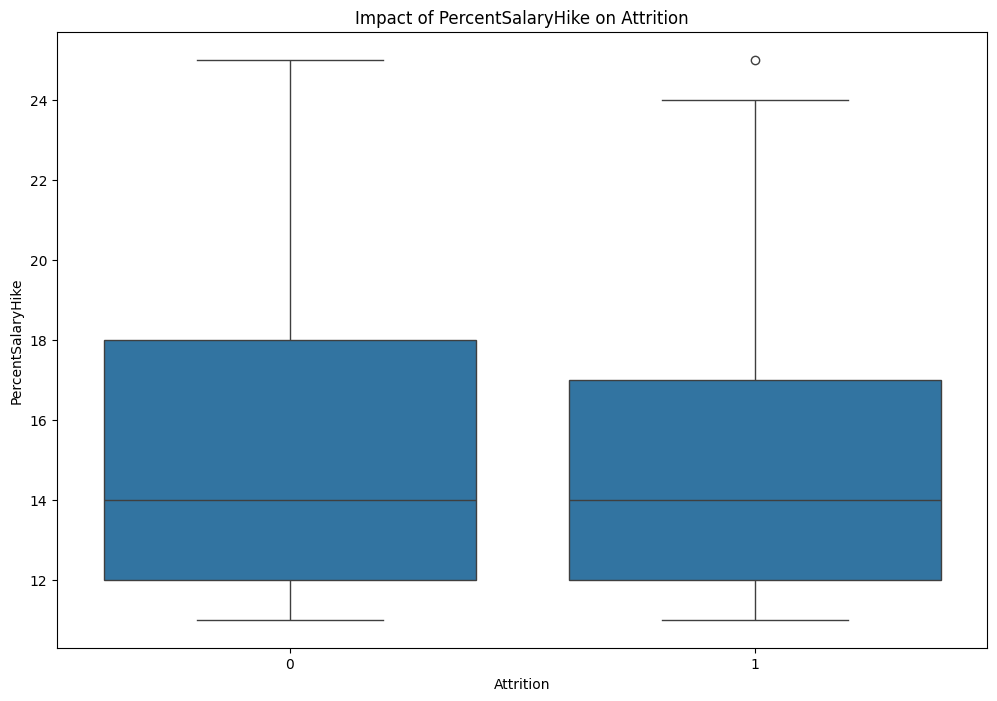

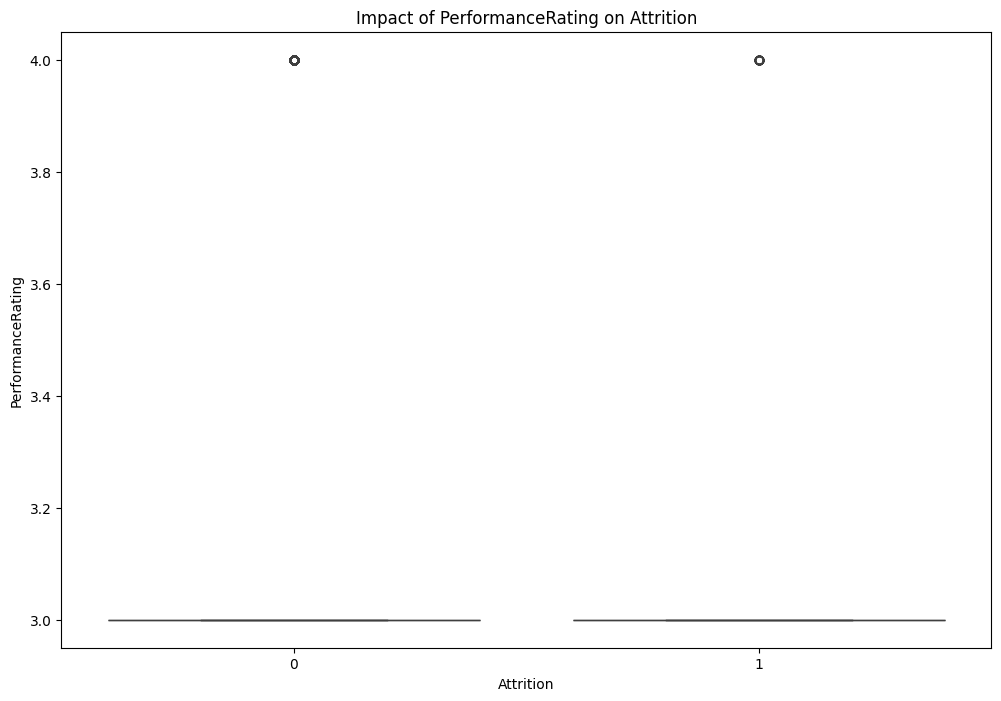

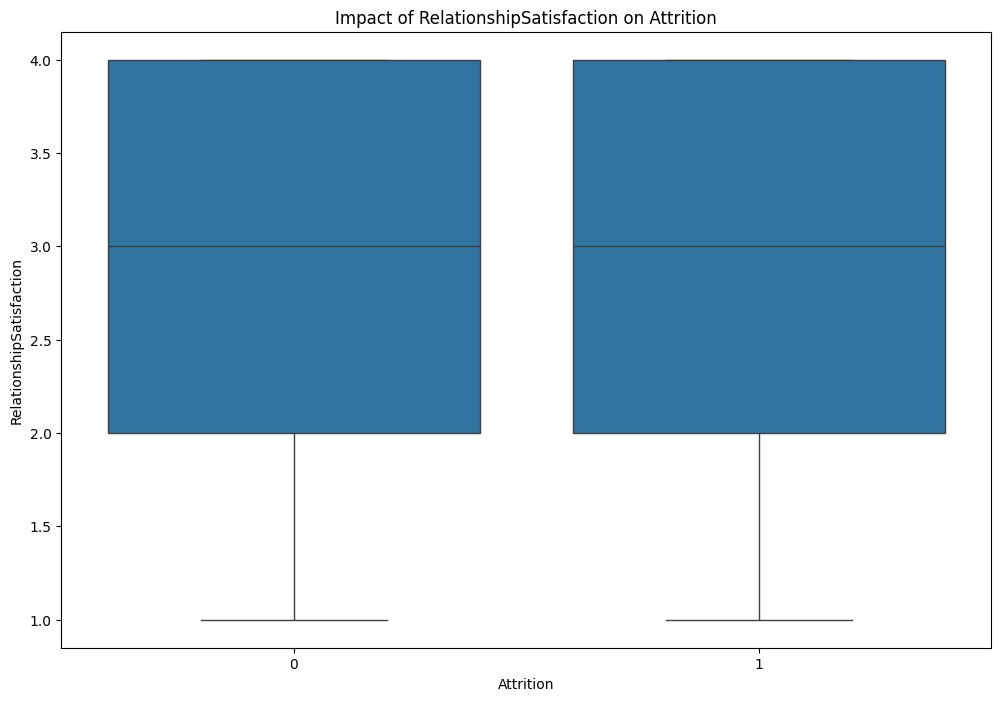

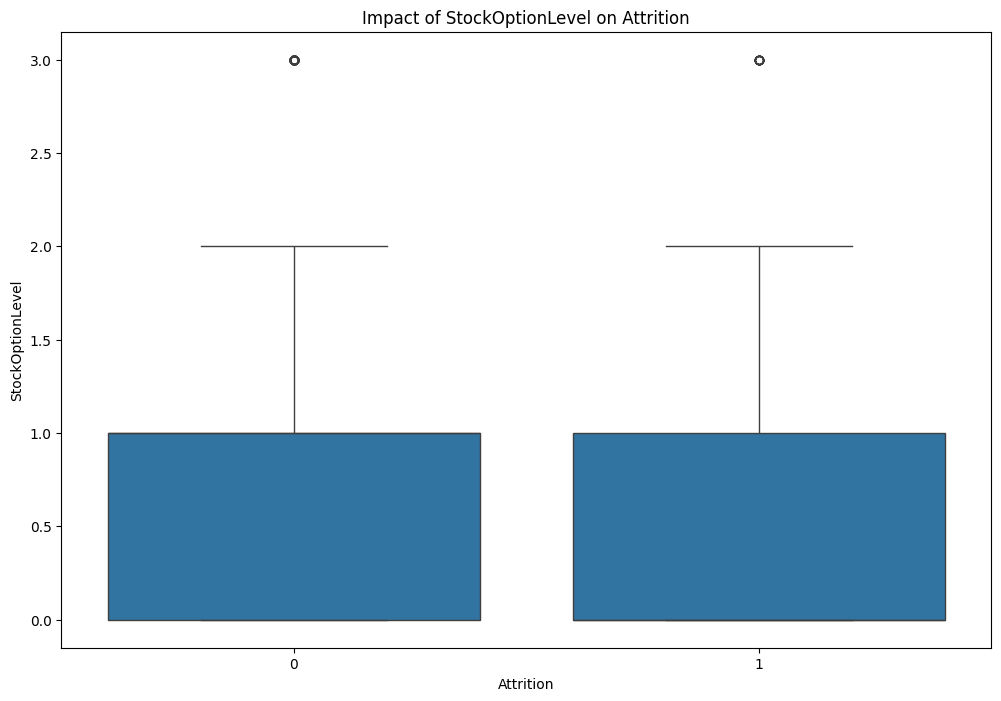

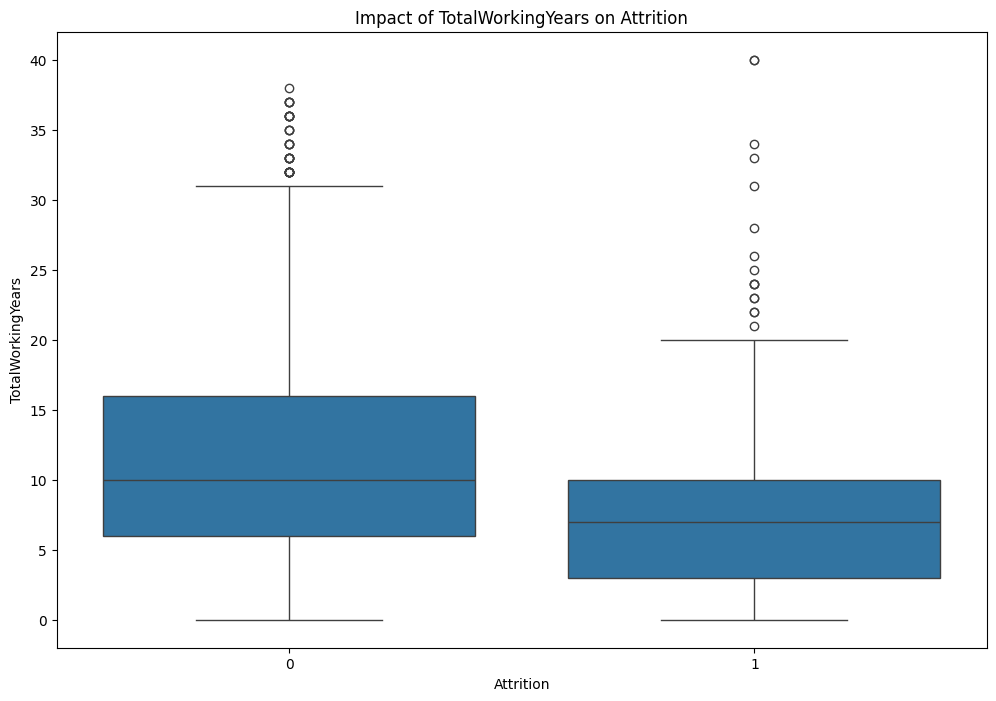

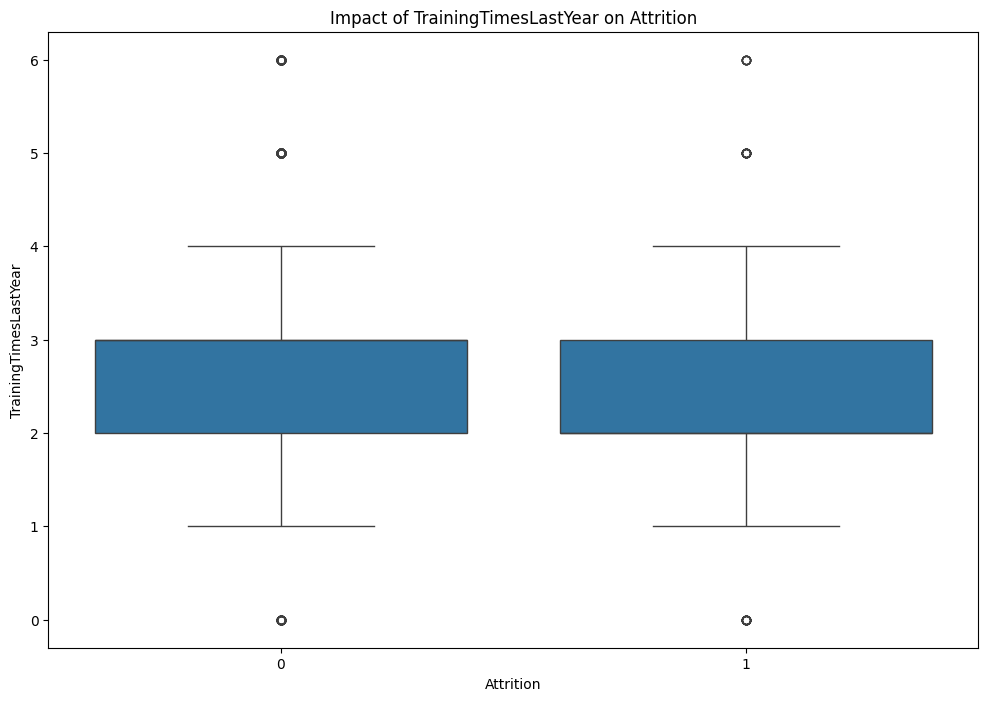

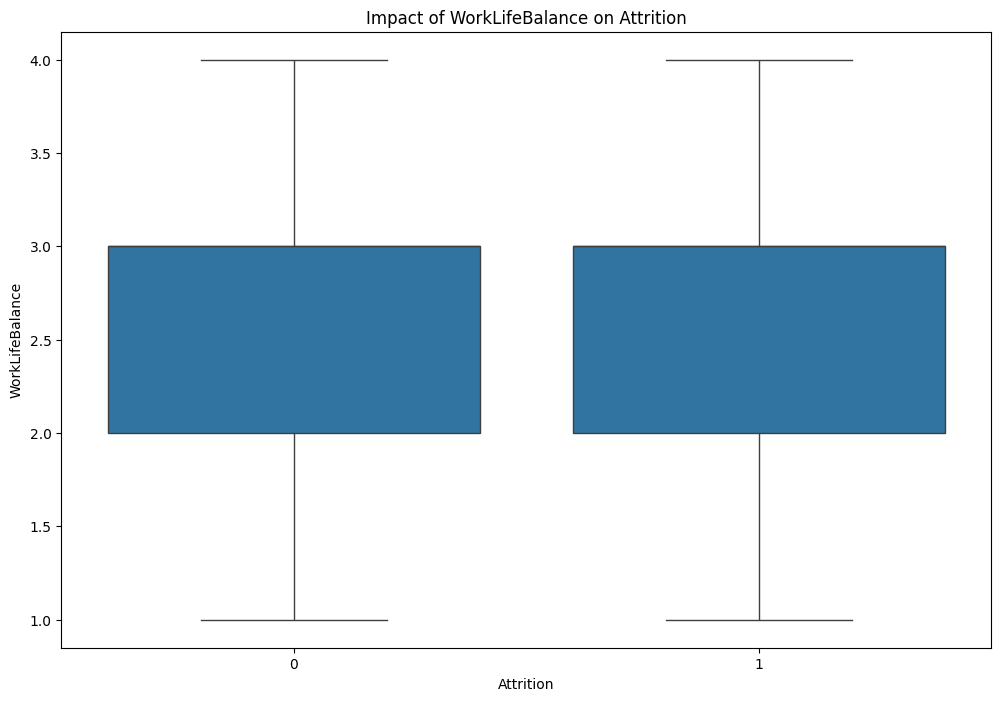

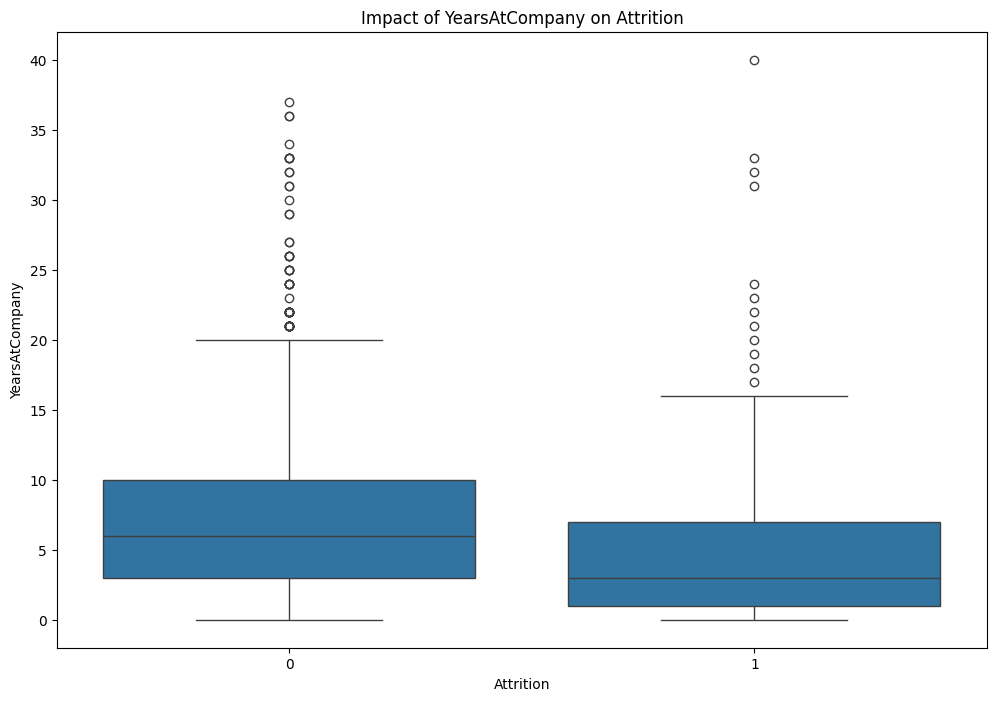

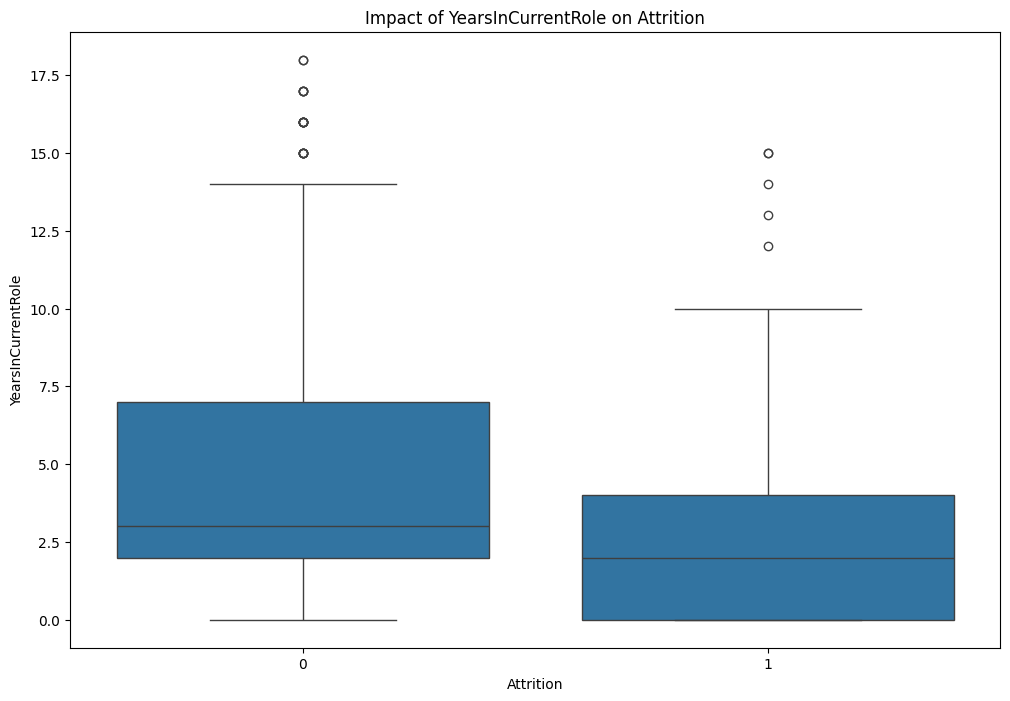

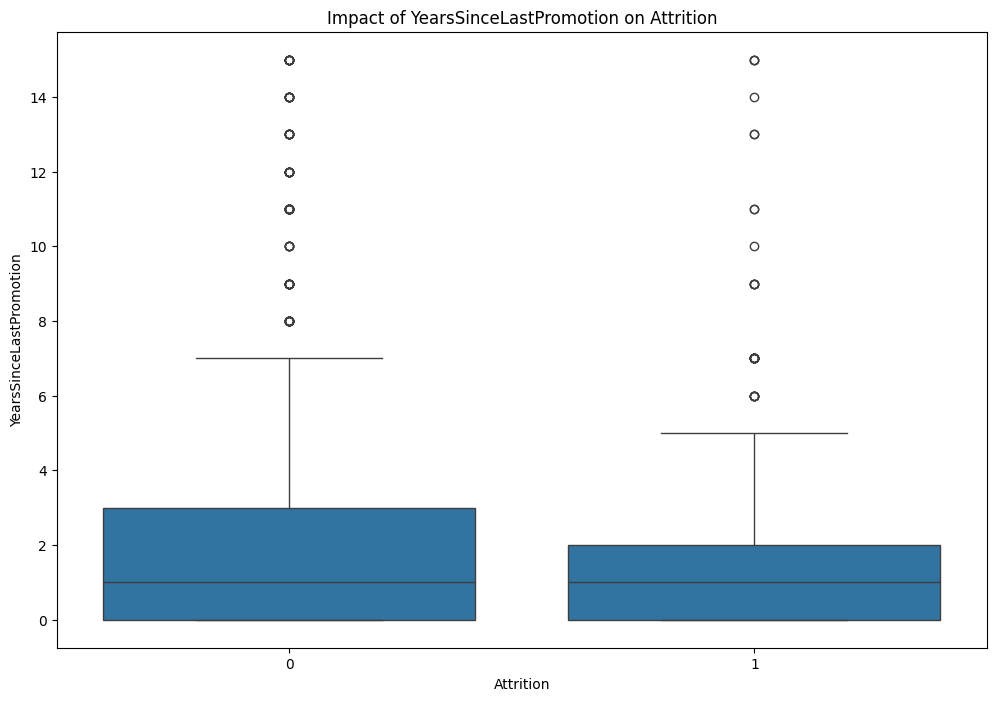

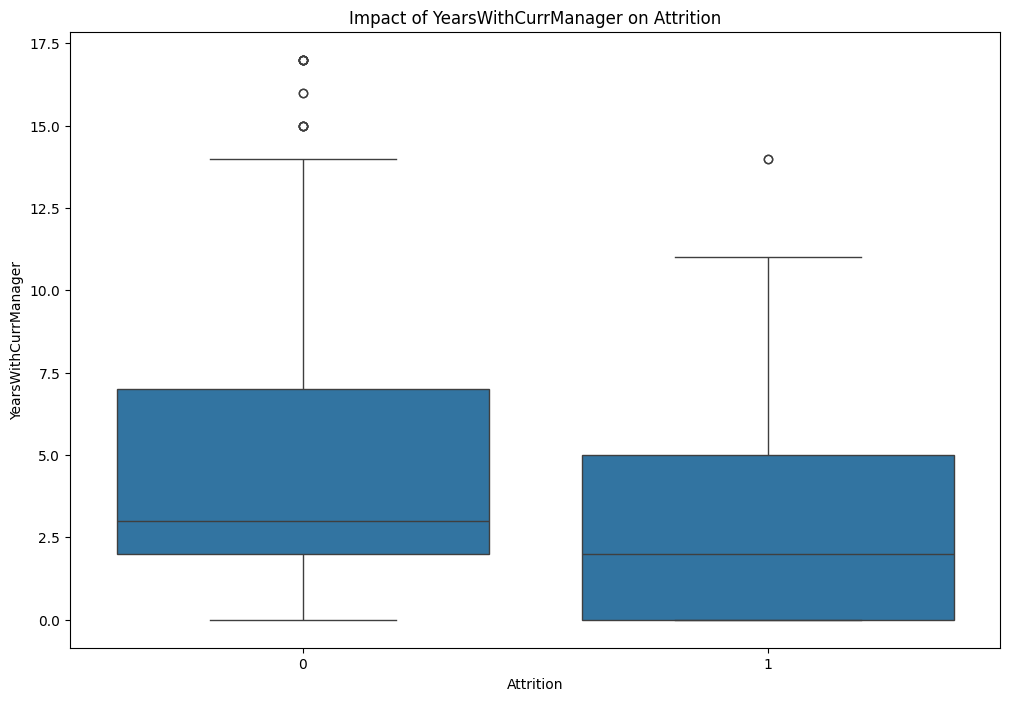

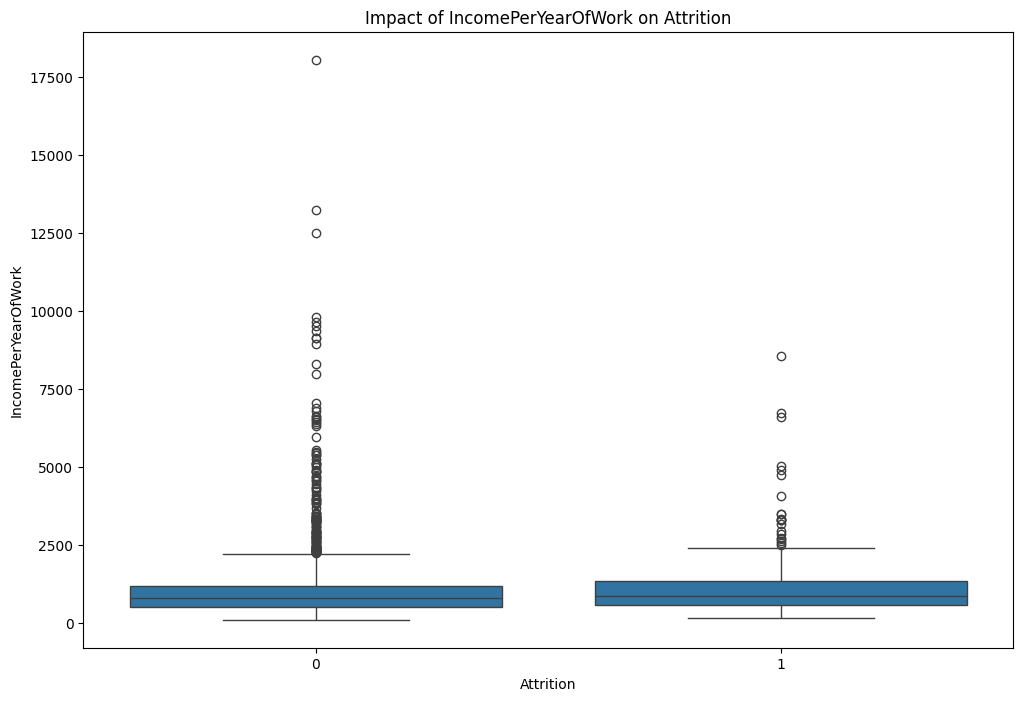

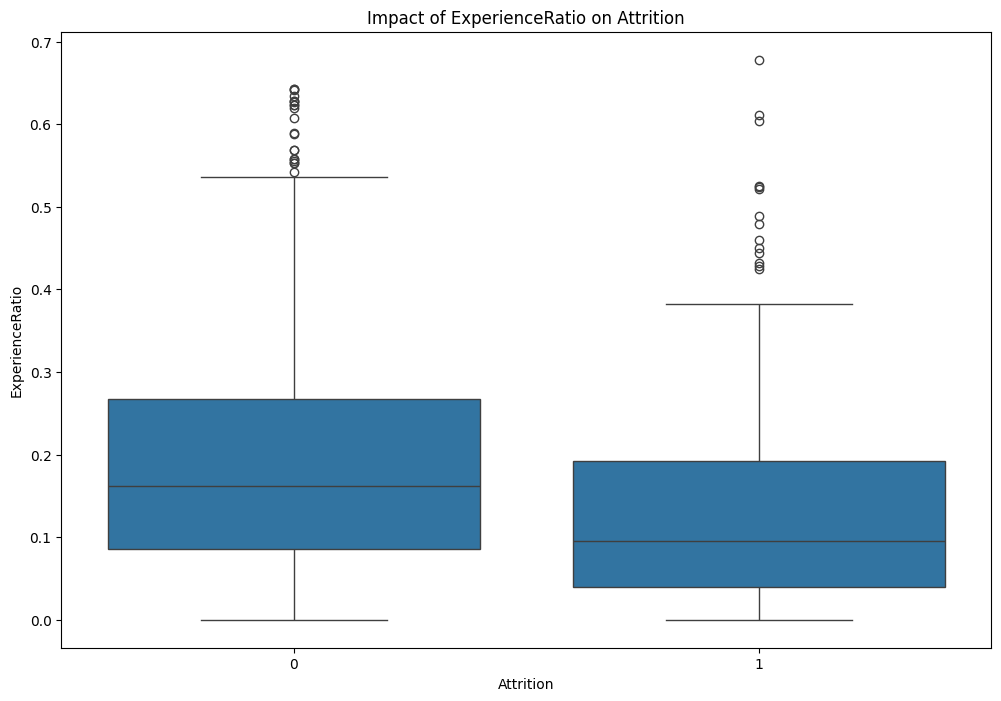

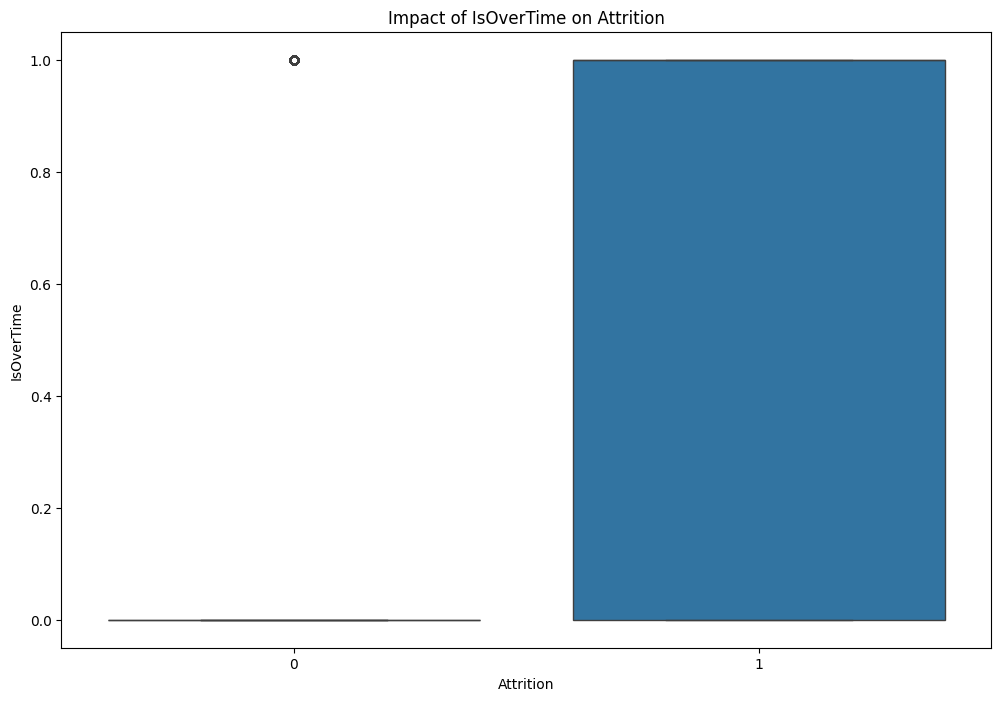

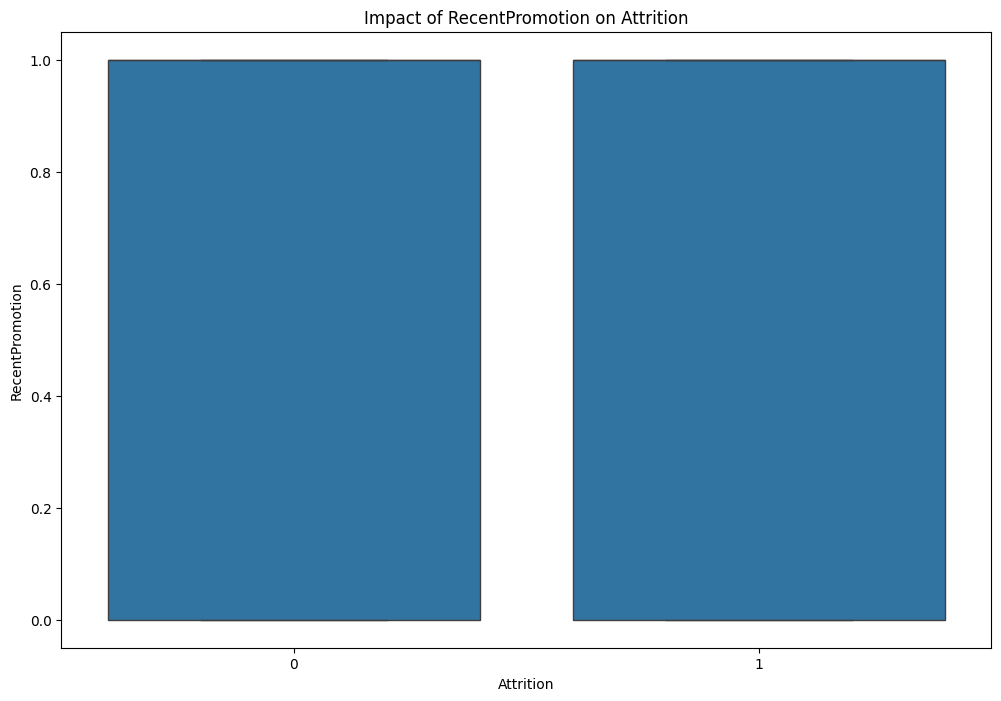

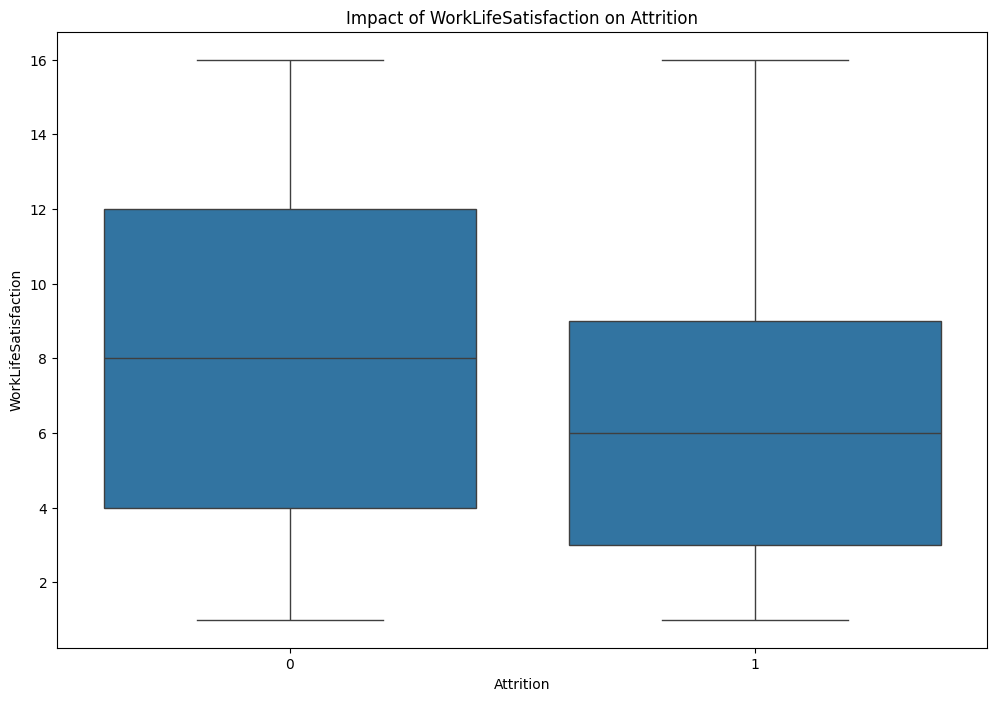

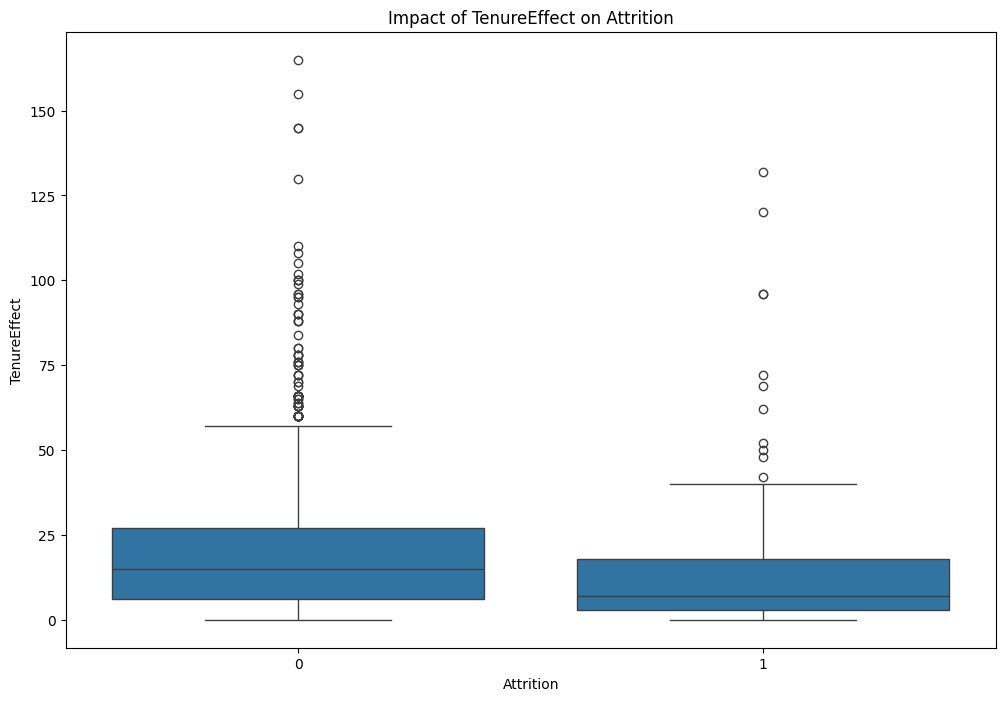

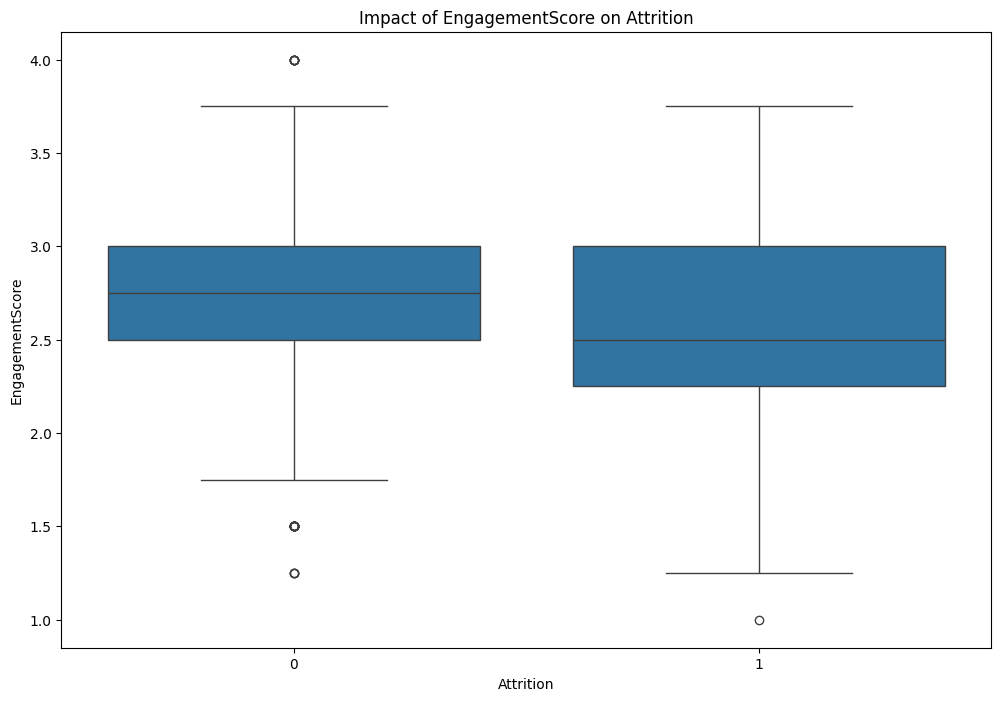

In [116]:
# impact of numerical features on attrition
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_columns if col != 'Attrition']
plt.figure(figsize=(12, 8))
import seaborn as sns
for col in numerical_features:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'Impact of {col} on Attrition')
    plt.show()

In [117]:
#found outliers in many columns
# Find columns with outliers using IQR method
outlier_columns = []
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    if not outliers.empty:
        outlier_columns.append(col)

print("Columns with outliers:", outlier_columns)

Columns with outliers: ['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'IncomePerYearOfWork', 'ExperienceRatio', 'TenureEffect', 'EngagementScore']


In [118]:
# printing outlier values
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Outliers in {col}:\n", outliers[[col, 'Attrition']])
# No need to handle outliers as they are not errors → they represent valid but rare employee cases.

Outliers in MonthlyIncome:
       MonthlyIncome  Attrition
25            19094          0
29            18947          0
45            19545          1
62            18740          0
105           18844          0
...             ...        ...
1374          17875          0
1377          19161          0
1401          19636          0
1437          19431          0
1443          18880          0

[114 rows x 2 columns]
Outliers in NumCompaniesWorked:
       NumCompaniesWorked  Attrition
4                      9          0
38                     9          0
50                     9          1
95                     9          0
105                    9          0
122                    9          1
194                    9          0
198                    9          0
208                    9          0
245                    9          0
287                    9          0
290                    9          0
334                    9          0
371                    9          0
372

In [119]:
# Find numerical columns that significantly affect employee attrition using correlation
correlations = df[numerical_features].corrwith(df['Attrition']).abs().sort_values(ascending=False)
significant_numerical = correlations[correlations > 0.1]  # threshold can be adjusted
print("Numerical columns significantly affecting employee attrition:")
print(significant_numerical)

Numerical columns significantly affecting employee attrition:
IsOverTime                 0.246118
TotalWorkingYears          0.171063
JobLevel                   0.169105
YearsInCurrentRole         0.160545
MonthlyIncome              0.159840
Age                        0.159205
EngagementScore            0.159092
YearsWithCurrManager       0.156199
ExperienceRatio            0.138037
StockOptionLevel           0.137145
TenureEffect               0.135442
YearsAtCompany             0.134392
JobInvolvement             0.130016
WorkLifeSatisfaction       0.119577
JobSatisfaction            0.103481
EnvironmentSatisfaction    0.103369
dtype: float64


In [120]:
from scipy.stats import mannwhitneyu
## Find numerical columns that significantly affect employee attrition using t-test
results = []

for col in numerical_columns:
    group_yes = df[df['Attrition'] == 1][col]
    group_no = df[df['Attrition'] == 0][col]
    
    # Skip if one group is empty
    if len(group_yes) < 2 or len(group_no) < 2:
        continue
    
    stat, p_value = mannwhitneyu(group_yes, group_no, alternative='two-sided')
    results.append((col, p_value))

significant_numfeatures = pd.DataFrame(results, columns=['Feature', 'p_value'])
significant_numfeatures = significant_numfeatures[significant_numfeatures['p_value'] < 0.05].sort_values('p_value')

print("Numerical features significantly affecting employee attrition:")
print(significant_numfeatures)

Numerical features significantly affecting employee attrition:
                    Feature       p_value
1                 Attrition  0.000000e+00
27               IsOverTime  3.985654e-21
18        TotalWorkingYears  2.399569e-14
11            MonthlyIncome  2.950831e-14
30             TenureEffect  7.660204e-14
21           YearsAtCompany  2.916191e-13
9                  JobLevel  2.956987e-13
22       YearsInCurrentRole  4.429560e-12
24     YearsWithCurrManager  1.806754e-11
17         StockOptionLevel  4.013375e-11
0                       Age  5.304342e-11
26          ExperienceRatio  1.985273e-10
31          EngagementScore  1.500362e-08
29     WorkLifeSatisfaction  1.578786e-06
8            JobInvolvement  4.651927e-06
10          JobSatisfaction  7.957918e-05
5   EnvironmentSatisfaction  2.173049e-04
3          DistanceFromHome  2.387047e-03
2                 DailyRate  2.900458e-02
23  YearsSinceLastPromotion  4.117911e-02
20          WorkLifeBalance  4.647300e-02
19    Trainin

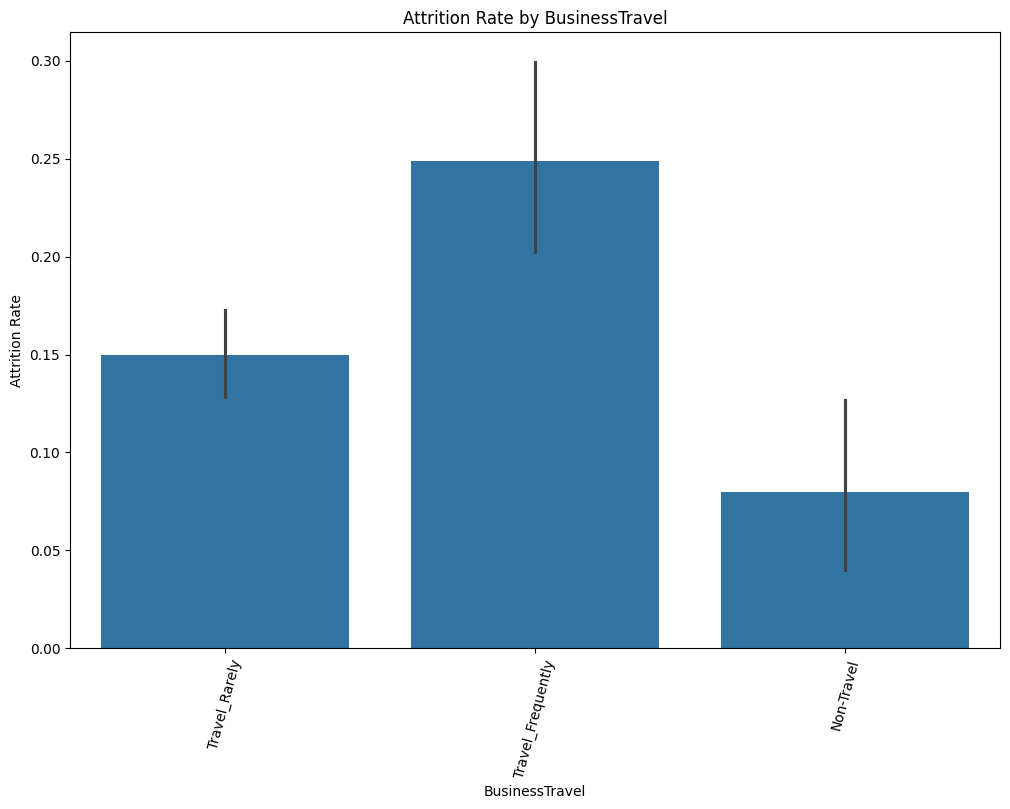

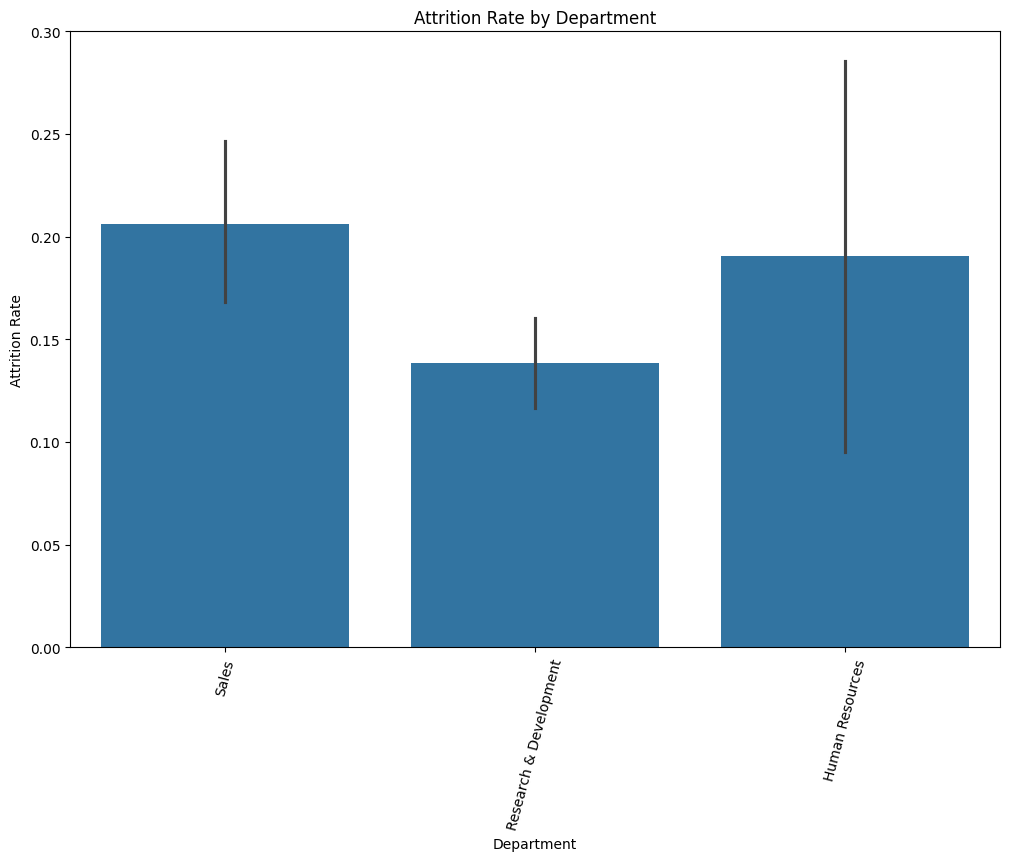

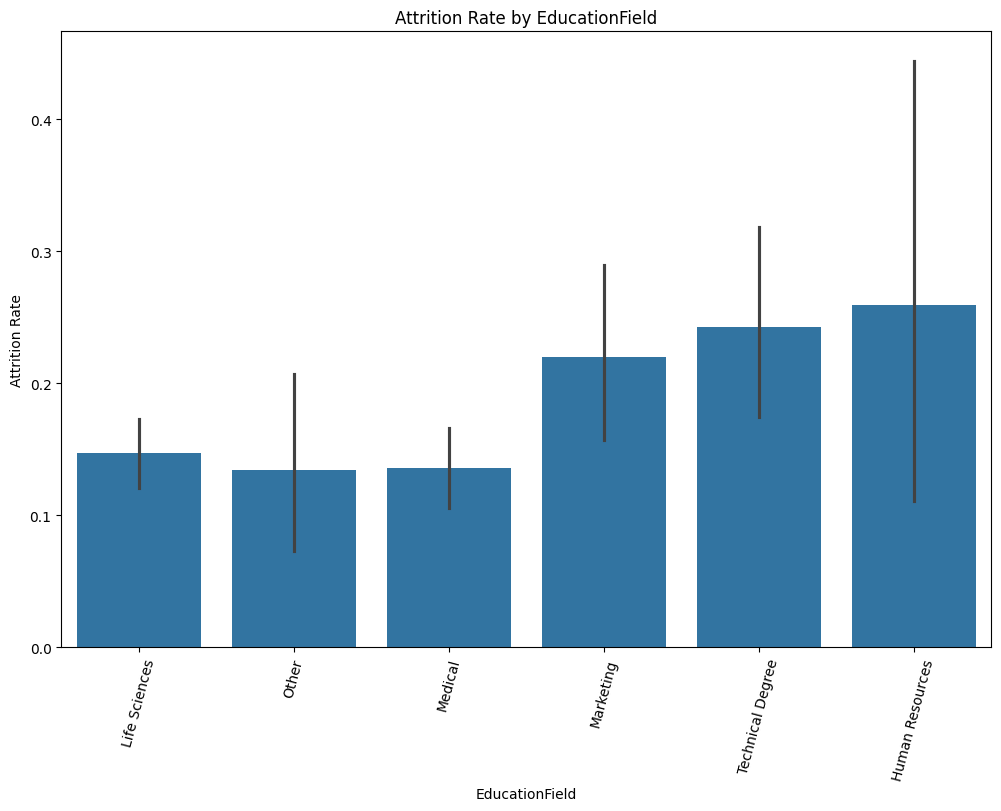

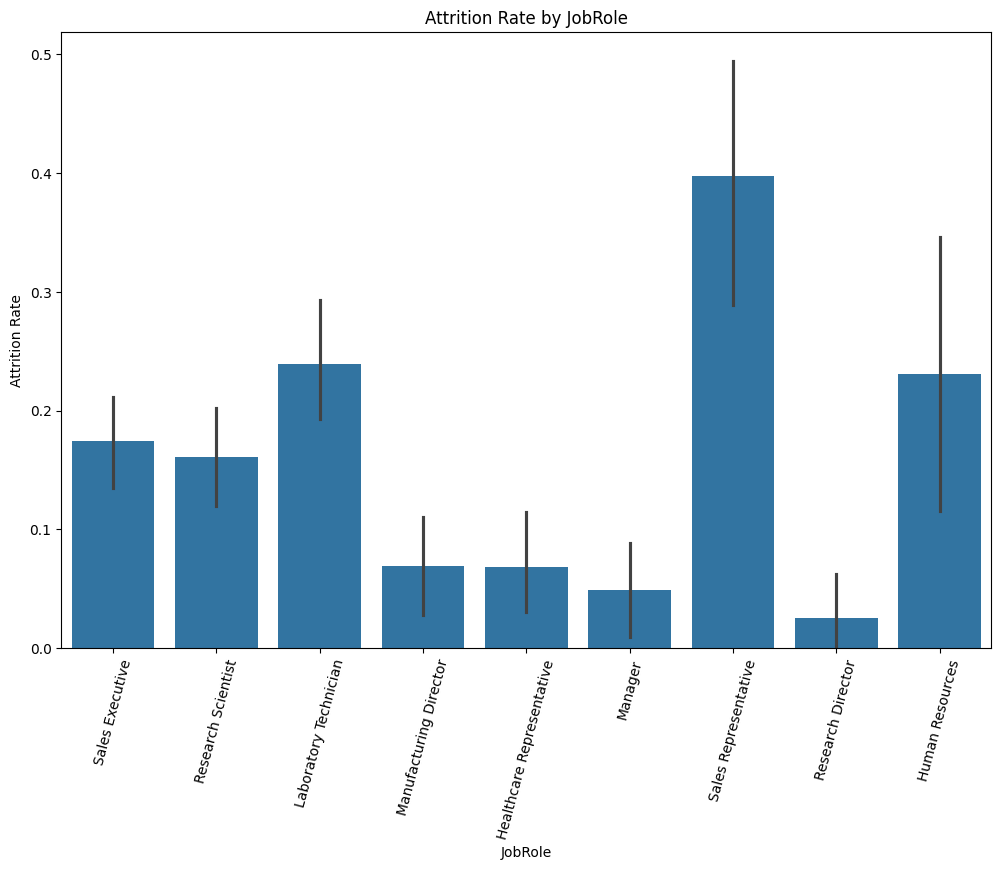

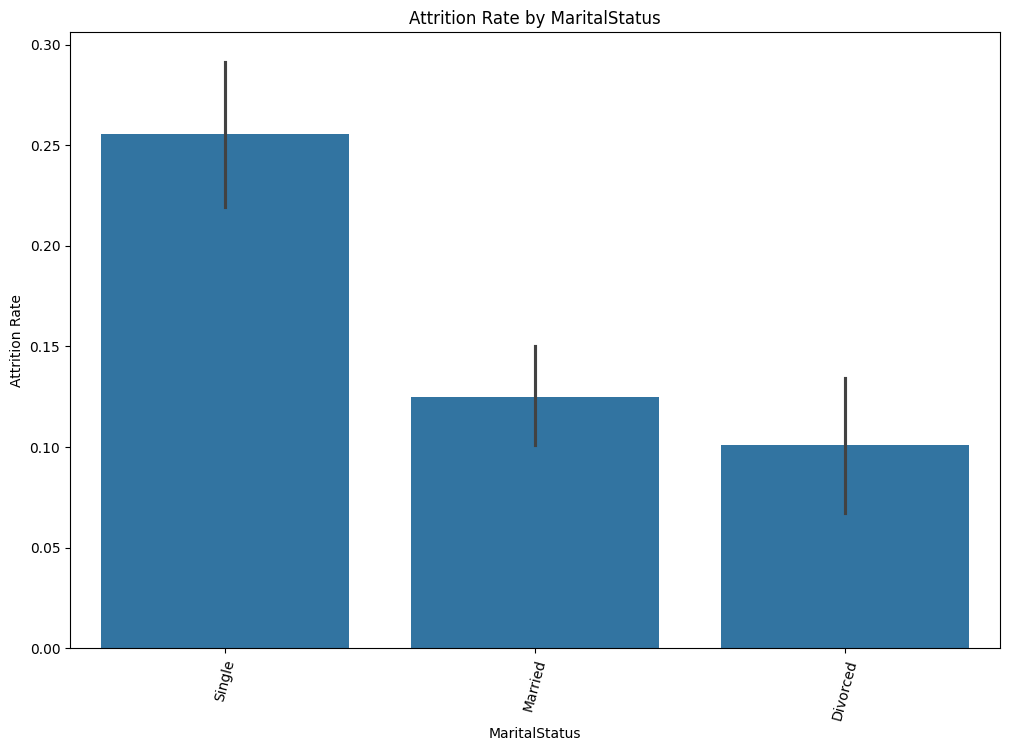

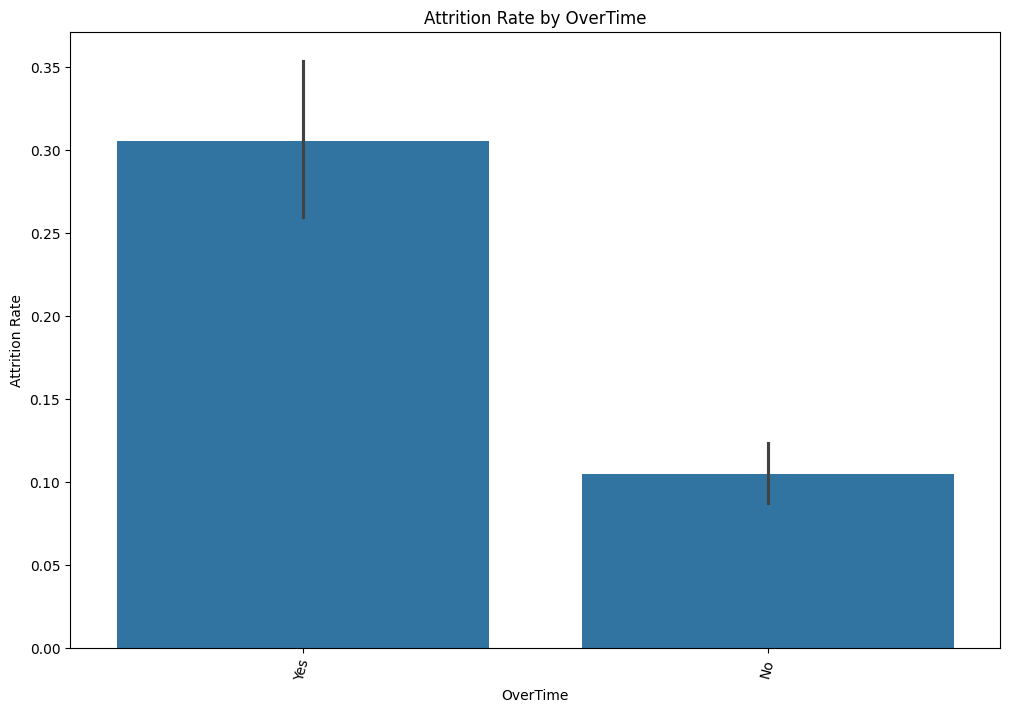

In [121]:
import numpy as np

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    plt.figure(figsize=(12,8))
    sns.barplot(data=df, x=col, y='Attrition', estimator=np.mean)
    plt.xticks(rotation=75)
    plt.title(f"Attrition Rate by {col}")
    plt.ylabel("Attrition Rate")
    plt.show()
    plt.close()

In [122]:
from scipy.stats import chi2_contingency

significant_categorical = []
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:
            significant_categorical.append((col, p))

significant_categorical_df = pd.DataFrame(significant_categorical, columns=['Feature', 'p_value']).sort_values('p_value')
print("Significant categorical columns affecting attrition:")
print(significant_categorical_df)

Significant categorical columns affecting attrition:
          Feature       p_value
5        OverTime  8.158424e-21
3         JobRole  2.752482e-15
4   MaritalStatus  9.455511e-11
0  BusinessTravel  5.608614e-06
1      Department  4.525607e-03
2  EducationField  6.773980e-03


In [123]:
# Correlation of features with attrition
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
attrition_correlation = correlation_matrix['Attrition'].sort_values(ascending=False)
print("Correlation of features with attrition:")
print(attrition_correlation)

Correlation of features with attrition:
Attrition                   1.000000
IsOverTime                  0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
RecentPromotion             0.029916
Gender                      0.029453
MonthlyRate                 0.015170
PerformanceRating           0.002889
IncomePerYearOfWork        -0.003005
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
WorkLifeSatisfaction       -0.119577
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
TenureEffect               -0.135442
StockOptionLevel           -0.137145
ExperienceRatio            -0.138037
YearsWithCurrManager       -0.15619

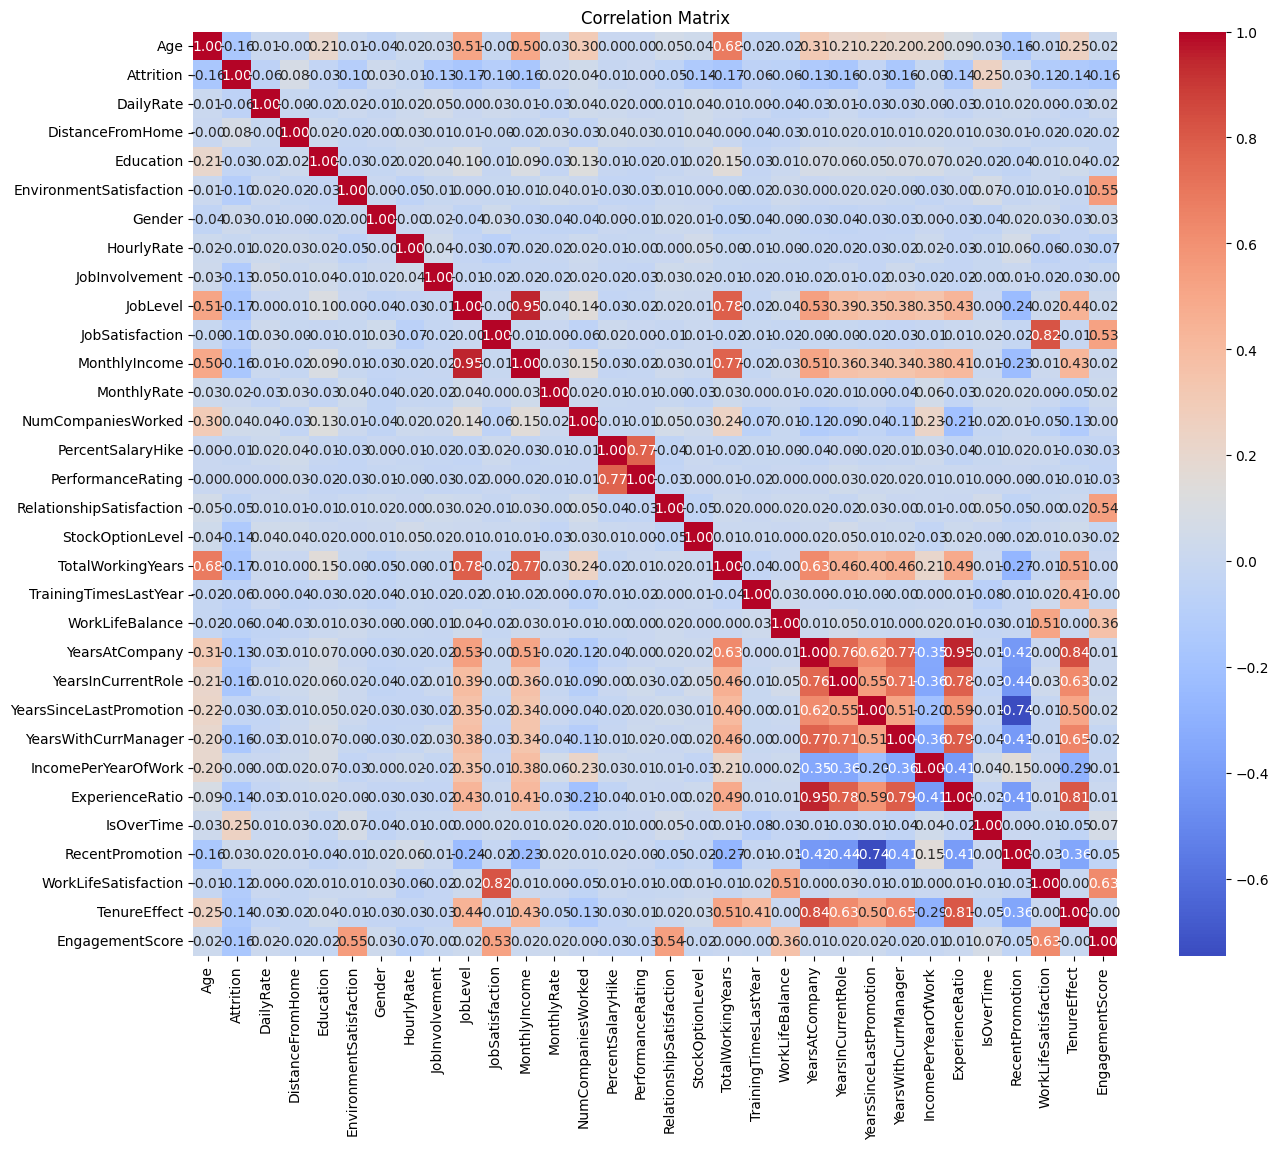

In [124]:
# Correlation map of features with attrition

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

In [125]:
# creating a table with only significant features
significant_features = significant_numfeatures['Feature'].tolist()+ significant_categorical_df['Feature'].tolist()



df_significant = df[significant_features]

In [126]:
# # applying one-hot encoding for categorical variables
df= pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# MODEL DEVELOPMENT


In [128]:
# defining X and y
X = df.drop('Attrition', axis=1)

y = df['Attrition']

In [129]:
#training the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [130]:
#Oversampling for imbalance in attrition
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [131]:
# Training with logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

Y_pred_lr = log_reg.predict(X_test)
# evaluation metrics (classification report, confusion matrix, AUC-ROC)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

print(classification_report(y_test, Y_pred_lr))
print(confusion_matrix(y_test, Y_pred_lr))
print(roc_auc_score(y_test, Y_pred_lr))


              precision    recall  f1-score   support

           0       0.90      0.83      0.86       247
           1       0.36      0.51      0.42        47

    accuracy                           0.78       294
   macro avg       0.63      0.67      0.64       294
weighted avg       0.81      0.78      0.79       294

[[205  42]
 [ 23  24]]
0.6702989060211904


C:\Users\Atchaya Raveendran\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#CONCLUSION= The logistic regression model has been trained and evaluated on the employee attrition dataset. The model's performance metrics indicate its effectiveness in predicting employee attrition(Low accuracy and AUC-ROC score). Further improvements can be made by exploring other algorithms, feature engineering, and hyperparameter tuning.


In [ ]:
# Training with KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# evaluation metrics (classification report, confusion matrix, AUC-ROC)

Y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, Y_pred_knn))
print(confusion_matrix(y_test, Y_pred_knn))
print(roc_auc_score(y_test, Y_pred_knn))


              precision    recall  f1-score   support

           0       0.86      0.68      0.76       247
           1       0.20      0.43      0.27        47

    accuracy                           0.64       294
   macro avg       0.53      0.55      0.51       294
weighted avg       0.76      0.64      0.68       294

[[167  80]
 [ 27  20]]
0.5508226376087518


              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.56      0.32      0.41        47

    accuracy                           0.85       294
   macro avg       0.72      0.64      0.66       294
weighted avg       0.83      0.85      0.83       294

[[235  12]
 [ 32  15]]


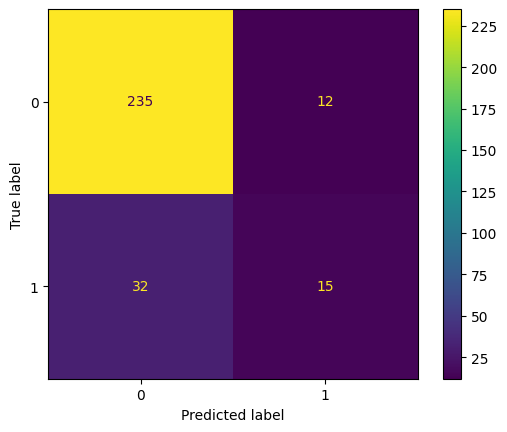

In [132]:
#Training with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=4)
rf.fit(X_train, y_train)


from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
# evaluation metrics (classification report, confusion matrix, AUC-ROC)

Y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, Y_pred_rf))
print(confusion_matrix(y_test, Y_pred_rf))


from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, Y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [133]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# Improving F1 score: Try ensemble stacking with top models


# Define base models
estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
]

# Stacking classifier
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1
)

stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)

print(classification_report(y_test, y_pred_stack))
print("F1 score (class 1):", f1_score(y_test, y_pred_stack, pos_label=1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.58      0.38      0.46        47

    accuracy                           0.86       294
   macro avg       0.74      0.67      0.69       294
weighted avg       0.84      0.86      0.84       294

F1 score (class 1): 0.46153846153846156


In [134]:
# Hyperparameter tuning for Random Forest using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

#potential parameters
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}



random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5, 
    verbose=2,
    random_state=42,
    n_jobs=-1 
)


random_search.fit(X_train, y_train)


print("Best parameters from Randomized Search:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters from Randomized Search: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [135]:
from sklearn.model_selection import GridSearchCV




param_grid = {
    'n_estimators': [150, 200, 250],          # Values around 200
    'max_depth': [None, 30],               # Values around None
    'min_samples_split': [2, 3],             # Values around 2
    'min_samples_leaf': [1, 2],              # Values around 1
    'max_features': ['log2']                 
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                                  
    verbose=2,
    n_jobs=-1                                # Use all available CPU cores
)


grid_search.fit(X_train, y_train)


print("Best parameters from Grid Search:", grid_search.best_params_)


print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\Atchaya Raveendran\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters from Grid Search: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best cross-validation score: 0.9412465462957014


In [136]:
# Fitting the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)

print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))



              precision    recall  f1-score   support

           0       0.89      0.96      0.93       247
           1       0.68      0.40      0.51        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.72       294
weighted avg       0.86      0.87      0.86       294

[[238   9]
 [ 28  19]]


In [ ]:
# training with Lightgradient boost model
from lightgbm import LGBMClassifier


lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))
print(roc_auc_score(y_test, y_pred_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 986, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.60      0.32      0.42        47

    accuracy                           0.86       294
   macro avg       0.74      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294

[[237  10]
 [ 32  15]]
0.6393315531053492


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score

# Hyperparameter tuning for LGBM to improve F1 score
param_grid_lgbm = {
    'num_leaves': [31, 50, 70],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

lgbm_grid = GridSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_grid=param_grid_lgbm,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

lgbm_grid.fit(X_train, y_train)
best_lgbm = lgbm_grid.best_estimator_
y_pred_lgbm_best = best_lgbm.predict(X_test)

print(classification_report(y_test, y_pred_lgbm_best))
print("Best F1 score:", f1_score(y_test, y_pred_lgbm_best, pos_label=1))
print("Best LGBM parameters:", lgbm_grid.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 986, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.64      0.38      0.48        47

    accuracy                           0.87       294
   macro avg       0.77      0.67      0.70       294
weighted avg       0.85      0.87      0.85       294

Best F1 score: 0.48
Best LGBM par

In [ ]:

# 3. Train XGB Model
import xgboost as xgb


xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_model.fit(X_train, y_train)

# evaluation metrics (classification report, confusion matrix, AUC-ROC)

Y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, Y_pred_xgb))
print(confusion_matrix(y_test, Y_pred_xgb))
print(roc_auc_score(y_test, Y_pred_xgb))

C:\Users\Atchaya Raveendran\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:18:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.72      0.38      0.50        47

    accuracy                           0.88       294
   macro avg       0.81      0.68      0.72       294
weighted avg       0.86      0.88      0.86       294

[[240   7]
 [ 29  18]]
0.6773193212162977


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score

# Hyperparameter grid for XGB
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
y_pred_xgb_best = best_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb_best))
print("Best F1 score:", f1_score(y_test, y_pred_xgb_best, pos_label=1))
print("Best XGB parameters:", xgb_grid.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Atchaya Raveendran\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:20:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294

Best F1 score: 0.4444444444444444
Best XGB parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:

# Use best estimators from grid search for RF, LGBM, XGB
estimators = [
    ('rf', grid_search.best_estimator_),
    ('lgbm', lgbm_grid.best_estimator_),
    ('xgb', xgb_grid.best_estimator_),
    
]

stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1
)

stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)

print(classification_report(y_test, y_pred_stack))
print("F1 score (class 1):", f1_score(y_test, y_pred_stack, pos_label=1))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       247
           1       0.59      0.43      0.49        47

    accuracy                           0.86       294
   macro avg       0.74      0.68      0.71       294
weighted avg       0.85      0.86      0.85       294

F1 score (class 1): 0.49382716049382713


# BEST MODEL

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       247
           1       0.68      0.40      0.51        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.72       294
weighted avg       0.86      0.87      0.86       294

0.8197088465845466


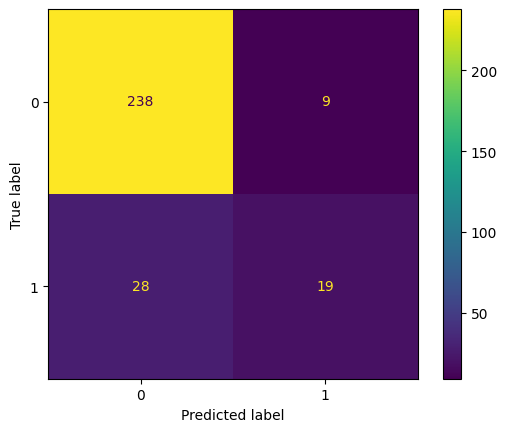

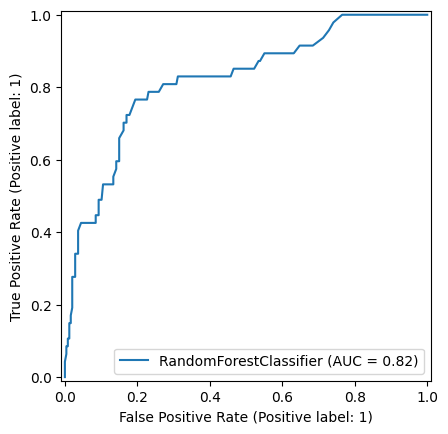

In [137]:
# Out of all models, the best one is Random forest with hyperparameter tuning. 
print(classification_report(y_test, y_pred_best))

y_probs = best_rf.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_probs))

#Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)

# ROC AUC curve
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_rf, X_test, y_test)

# FEATURE IMPORTANCE


Top 10 Key Drivers of Attrition:
                             Feature  Importance
50                      OverTime_Yes    0.085758
49              MaritalStatus_Single    0.055658
16                  StockOptionLevel    0.041717
30                   EngagementScore    0.040517
10                     MonthlyIncome    0.036058
0                                Age    0.030643
7                     JobInvolvement    0.029161
9                    JobSatisfaction    0.028920
17                 TotalWorkingYears    0.028694
31  BusinessTravel_Travel_Frequently    0.027850


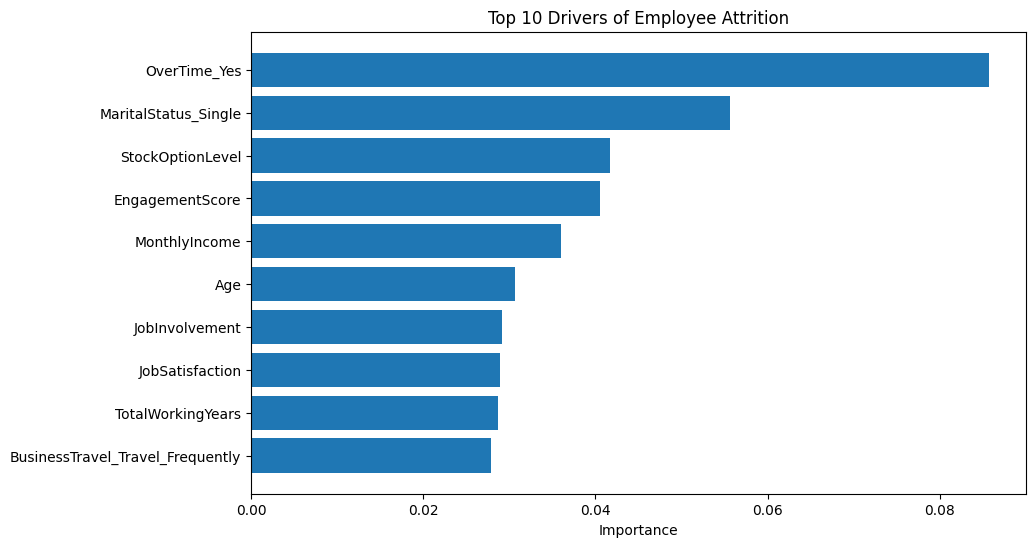

In [138]:
# Get feature importance from the trained model

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top 10 features
print("Top 10 Key Drivers of Attrition:")
print(feature_importance.head(10))

# Optional: Plot top 10 features
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'].head(10)[::-1], feature_importance['Importance'].head(10)[::-1])
plt.xlabel('Importance')
plt.title('Top 10 Drivers of Employee Attrition')
plt.show()


# AT-RISK EMPLOYEES


In [139]:

# Copy X_test to avoid modifying original
df = X_test.copy()

# Add predicted probability column
df['Attrition_Prob'] = y_probs  # y_probs should be the probability of leaving

# Define threshold for "at-risk" employees (adjust as needed)
threshold = 0.5
df['At_Risk'] = df['Attrition_Prob'] >= threshold

# Filter only at-risk employees and sort by probability
at_risk_employees = df[df['At_Risk']].sort_values(by='Attrition_Prob', ascending=False)

# Optional: select key columns to show (add more if needed)
columns_to_show = ['Attrition_Prob', 'JobSatisfaction', 'MonthlyIncome', 'YearsAtCompany', 'WorkLifeBalance']
top_at_risk = at_risk_employees[columns_to_show]

# Display top at-risk employees
print(top_at_risk.head(20))  # Display top 20 at-risk employees

      Attrition_Prob  JobSatisfaction  MonthlyIncome  YearsAtCompany  \
688            0.856                2           2121               1   
357            0.824                2           2174               3   
709            0.764                1           2321               3   
301            0.764                3           1200               0   
711            0.760                1           2404               0   
318            0.712                2           2478               4   
911            0.704                4           1118               1   
1391           0.684                1           2858               1   
514            0.644                1           3348              10   
132            0.644                3           4559               2   
670            0.624                3           2318               1   
762            0.616                1           2042               3   
1311           0.612                3           1514            

# Retention Strategies

In [140]:


# Copy original dataset
X_sim = X_test.copy()
X_sim['Attrition_Prob_Original'] = y_probs

# -----------------------------
# Simulate Retention Strategies
# -----------------------------

#  Reduce overtime
X_sim['OverTime_Yes'] = 0  # Assume employees no longer work overtime

# 2️⃣ Improve EngagementScore and JobSatisfaction by 1 point (max 4)
X_sim['EngagementScore'] = X_sim['EngagementScore'].apply(lambda x: min(x + 1, 4))
X_sim['JobSatisfaction'] = X_sim['JobSatisfaction'].apply(lambda x: min(x + 1, 4))

# 3️⃣ Increase MonthlyIncome for employees below a threshold
X_sim['MonthlyIncome'] = X_sim['MonthlyIncome'].apply(lambda x: x*1.1 if x < 5000 else x)

# 4️⃣ Optional: Provide stock options for low-level employees
X_sim['StockOptionLevel'] = X_sim['StockOptionLevel'].apply(lambda x: max(x, 2))

# -----------------------------
# Predict new attrition probabilities
# -----------------------------
new_probs = best_rf.predict_proba(X_sim.drop(columns=['Attrition_Prob_Original']))[:, 1]
X_sim['Attrition_Prob_After'] = new_probs

# -----------------------------
# Calculate reduction in risk
# -----------------------------
X_sim['Reduction'] = X_sim['Attrition_Prob_Original'] - X_sim['Attrition_Prob_After']
average_reduction = X_sim['Reduction'].mean()
print(f"Average reduction in attrition probability: {average_reduction:.2f}")

# -----------------------------
# See top employees benefiting most
# -----------------------------
top_benefit = X_sim.sort_values(by='Reduction', ascending=False).head(20)
print(top_benefit[['Attrition_Prob_Original','Attrition_Prob_After','Reduction']])


Average reduction in attrition probability: 0.06
      Attrition_Prob_Original  Attrition_Prob_After  Reduction
318                     0.712                 0.288      0.424
711                     0.760                 0.372      0.388
1028                    0.500                 0.136      0.364
132                     0.644                 0.292      0.352
36                      0.612                 0.268      0.344
709                     0.764                 0.432      0.332
762                     0.616                 0.284      0.332
2                       0.572                 0.268      0.304
1349                    0.556                 0.268      0.288
670                     0.624                 0.356      0.268
547                     0.400                 0.140      0.260
3                       0.372                 0.116      0.256
1297                    0.388                 0.132      0.256
829                     0.572                 0.316      0.256
357   

In [142]:
# Load raw file (with EmployeeNumber)
df_raw = pd.read_csv("Employee-Attrition(raw).csv")

# Make sure X_sim index lines up with test set
X_sim["EmployeeNumber"] = df_raw.loc[X_sim.index, "EmployeeNumber"]

# Merge results into raw dataset for full reporting
df_full = df_raw.merge(
    X_sim[["EmployeeNumber", "Attrition_Prob_Original", "Attrition_Prob_After", "Reduction"]],
    on="EmployeeNumber",
    how="left"
)

# Save merged dataset for Streamlit
df_full.to_csv("Employee-Attrition-with-simulation.csv", index=False)



# PREDICTION OF PERFORMANCE RATING

In [ ]:
df['PerformanceRating'].nunique()

2

In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# -----------------------------
# 1️⃣ Feature Selection
# -----------------------------
features = [
    'JobInvolvement', 'JobSatisfaction', 'WorkLifeBalance', 'YearsAtCompany',
    'MonthlyIncome', 'IsOverTime', 'EngagementScore', 'Age', 'JobRole_Human Resources', 'JobRole_Laboratory Technician',
    'JobRole_Manager', 'JobRole_Manufacturing Director',
    'JobRole_Research Director', 'JobRole_Research Scientist',
    'JobRole_Sales Executive', 'JobRole_Sales Representative',
    'TrainingTimesLastYear', 'StockOptionLevel',
]
X = df[features]

# 2️⃣ Convert Performance Rating to Binary
# -----------------------------
# High = 1, Not-High = 0
y = df['PerformanceRating'].apply(lambda x: 1 if x==4 else 0)

# Check if y has more than one class
if y.nunique() < 2:
    print("Error: The target 'y' needs to have more than 1 class. Got only one class:", y.unique())
else:
    # -----------------------------
    # 3️⃣ Encode Categorical Features
    # -----------------------------
    X_encoded = pd.get_dummies(X, drop_first=True)

    # -----------------------------
    # 4️⃣ Train-Test Split
    # -----------------------------
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, test_size=0.3, random_state=42, stratify=y
    )
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# -----------------------------
# 5️⃣ Train Random Forest with Class Balancing
# -----------------------------
rf_perfmodel = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42,
    class_weight='balanced'  # Important for rare High class
)
rf_perfmodel.fit(X_train_res, y_train_res)

# -----------------------------
# 6️⃣ Predict and Evaluate
# -----------------------------
y_pred = rf_perfmodel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Not-High','High']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# 7️⃣ Predict for all employees
# -----------------------------
df['Predicted_High_Performer'] = rf_perfmodel.predict(X_encoded)
df['Predicted_High_Performer'] = df['Predicted_High_Performer'].map({1:'High', 0:'Not-High'})

# Optional: preview results
print(df[['PerformanceRating','Predicted_High_Performer']].head())



Accuracy: 0.8202247191011236

Classification Report:
               precision    recall  f1-score   support

    Not-High       0.90      0.90      0.90        77
        High       0.33      0.33      0.33        12

    accuracy                           0.82        89
   macro avg       0.61      0.61      0.61        89
weighted avg       0.82      0.82      0.82        89


Confusion Matrix:
 [[69  8]
 [ 8  4]]
      PerformanceRating Predicted_High_Performer
1061                  3                 Not-High
891                   3                 Not-High
456                   4                 Not-High
922                   3                 Not-High
69                    3                 Not-High


In [ ]:
# Hyperparameter grid for Random Forest to improve F1 score for 'High' class
param_grid_rf = {
    'n_estimators': [220, 200, 250],
    'max_depth': [5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1',  # F1 for positive class (High)
    cv=5,
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train_res, y_train_res)
best_rf_high = rf_grid.best_estimator_
y_pred_high = best_rf_high.predict(X_test)

print(classification_report(y_test, y_pred_high, target_names=['Not-High','High']))
print("Best F1 score (High):", f1_score(y_test, y_pred_high, pos_label=1))
print("Best RF parameters:", rf_grid.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
              precision    recall  f1-score   support

    Not-High       0.88      0.90      0.89        77
        High       0.27      0.25      0.26        12

    accuracy                           0.81        89
   macro avg       0.58      0.57      0.58        89
weighted avg       0.80      0.81      0.81        89

Best F1 score (High): 0.2608695652173913
Best RF parameters: {'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Best threshold for F1 (High): 0.45
Best F1 score (High): 0.320


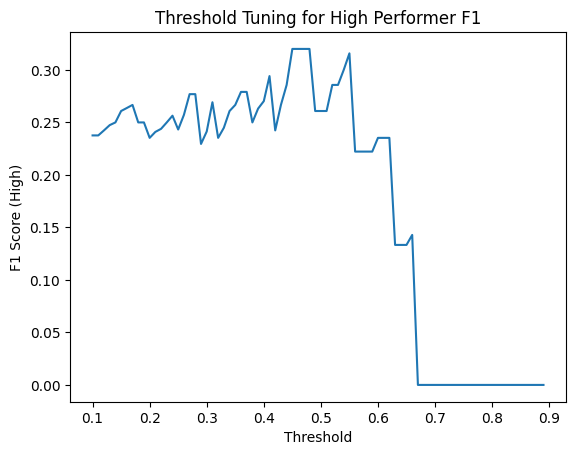

In [ ]:
from sklearn.metrics import f1_score

# Tune threshold for 'High' class (positive class = 1)
y_prob_high = best_rf_high.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_thr = (y_prob_high >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thr, pos_label=1)
    f1_scores.append(f1)

# Find best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold for F1 (High): {best_threshold:.2f}")
print(f"Best F1 score (High): {best_f1:.3f}")

# Optional: plot F1 vs threshold
plt.plot(thresholds, f1_scores)
plt.xlabel("Threshold")
plt.ylabel("F1 Score (High)")
plt.title("Threshold Tuning for High Performer F1")
plt.show()

In [ ]:
# Use best threshold tuning
y_pred_best = (y_prob_high >= best_threshold).astype(int)

print(classification_report(y_test, y_pred_best, target_names=['Not-High','High']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

              precision    recall  f1-score   support

    Not-High       0.89      0.88      0.89        77
        High       0.31      0.33      0.32        12

    accuracy                           0.81        89
   macro avg       0.60      0.61      0.60        89
weighted avg       0.82      0.81      0.81        89

Confusion Matrix:
 [[68  9]
 [ 8  4]]


In [ ]:
# save both prediction and paerformance model
import joblib

joblib.dump(best_rf, 'attrition_model.pkl')


['attrition_model.pkl']

In [ ]:
joblib.dump(rf_perfmodel, 'performance_model.pkl')

['performance_model.pkl']